In [746]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [747]:
#importing necessary libraries

import pandas as pd                                          # Pandas is a tool in python for data analysis
import numpy as np                                           # Numpy is a library in python for mathematical functions
import matplotlib.pyplot as plt                              # Matplotlib library in python for visualizations
import seaborn as sns                                        # Seaborn is a library in python for statistical graphs 
import plotly.express as px                                  # Plotly is a library in python for interactive visualizations
import geopandas as gpd                                      # Geopandas is a python library that provides support for geospatial data

In [703]:
from IPython.core.interactiveshell import InteractiveShell    # Used to execute all commands in a cell
InteractiveShell.ast_node_interactivity = "all"
#InteractiveShell.ast_node_interactivity = "last_expr"

## Reading files

In [704]:
df_2014=pd.read_csv(r"C:\Users\91961\Downloads\constituency_wise_results_2014.csv")     # reading 2014 file
df_2014.head(2)                                                                         # displaying 2 records of file

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Adilabad,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282
1,Andhra Pradesh,Adilabad,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282


In [705]:
df_2019=pd.read_csv(r"C:\Users\91961\Downloads\constituency_wise_results_2019.csv")      # reading 2019 file
df_2019.head(2)                                                                          # displaying 2 records of file

,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors
0,Andhra Pradesh,Aruku,KISHORE CHANDRA DEO,MALE,72.0,ST,TDP,Bicycle,336163,1938,338101,1451418
1,Andhra Pradesh,Aruku,Dr. KOSURI KASI VISWANADHA VEERA VENKATA SATYA...,MALE,54.0,ST,BJP,Lotus,17578,289,17867,1451418


In [706]:
df_sc=pd.read_csv(r"C:\Users\91961\Downloads\dim_states_codes.csv")       # Reading state_codes file
df_sc.head(2)

df_sc.rename(columns = {'state_name':'state'}, inplace = True)            # Replacing column name from state_name to state to sunc with other files
df_sc.head(2)

,state_name,abbreviation
0,Andaman & Nicobar Islands,AN
1,Andhra Pradesh,AP


,state,abbreviation
0,Andaman & Nicobar Islands,AN
1,Andhra Pradesh,AP


## Data Cleaning

In [707]:
df_2014.dtypes                                                 # Obtaining data types of all columns of 2014 file
df_2019.dtypes                                                 # Obtaining data types of all columns of 2019 file

state              object
pc_name            object
candidate          object
sex                object
age               float64
category           object
party              object
party_symbol       object
general_votes       int64
postal_votes        int64
total_votes         int64
total_electors      int64
dtype: object

state              object
pc_name            object
candidate          object
sex                object
age               float64
category           object
party              object
party_symbol       object
general_votes       int64
postal_votes        int64
total_votes         int64
total_electors      int64
dtype: object

In [734]:
#Verifying for any null values in columns

df_2014.isnull().sum()                                         # Null vales found in sex, age & category columns because of 'NOTA"
df_2019.isnull().sum()                                         # Null vales found in sex, age, category & party_symbol columns because of 'NOTA"

state               0
pc_name             0
candidate           0
sex               510
age               510
category          510
party               0
party_symbol        0
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

state               0
pc_name             0
candidate           0
sex               543
age               543
category          543
party               0
party_symbol      543
general_votes       0
postal_votes        0
total_votes         0
total_electors      0
dtype: int64

510

In [737]:
# Obtaining unique state values and their count

df_2014['state'].nunique()                       # nunique is used to obtain count of unique values in a column in dataframe
df_2014['state'].unique()                        # unique is used to obtain unique values in a column in dataframe                        

34

array(['Telengana', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura',
       'Uttar Pradesh', 'West Bengal', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [710]:
df_2019['state'].nunique()                        # nunique is used to obtain count of unique values in a column in dataframe
df_2019['state'].unique()                         # unique is used to obtain unique values in a column in dataframe 

36

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh',
       'West Bengal', 'Chhattisgarh', 'Jharkhand', 'Uttarakhand',
       'Telangana', 'Andaman & Nicobar Islands', 'Chandigarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'NCT OF Delhi',
       'Lakshadweep', 'Puducherry'], dtype=object)

In [711]:
df_2014['pc_name'].isin(df_2019['pc_name']).value_counts()

pc_name
True     8298
False      57
Name: count, dtype: int64

In [740]:
# Obtaining constituency names from Telengana state from 2019 dataframe

df_2019[df_2019['state']=='Telangana']['pc_name'].unique()

array(['Adilabad _Telangana', 'Peddapalle _Telangana',
       'Karimnagar _Telangana', 'Nizamabad_Telangana',
       'Zahirabad_Telangana', 'Medak_Telangana', 'Malkajgiri_Telangana',
       'Secundrabad_Telangana', 'Hyderabad_Telangana',
       'CHEVELLA_Telangana', 'Mahbubnagar_Telangana',
       'Nagarkurnool_Telangana', 'Nalgonda_Telangana',
       'Bhongir _Telangana', 'Warangal_Telangana',
       'Mahabubabad  _Telangana', 'Khammam _Telangana'], dtype=object)

In [713]:
# Replacing the state name as Telegana from Andhra Pradesh to respective constituencies in 2014 dataframe becuase of bifurcation

telangana_pc_names=['Adilabad ', 'Peddapalle ', 'Karimnagar ', 'Nizamabad',
       'Zahirabad', 'Medak', 'Malkajgiri', 'Secundrabad', 'Hyderabad',
       'CHEVELLA', 'Mahbubnagar', 'Nagarkurnool', 'Nalgonda', 'Bhongir ',
       'Warangal', 'Mahabubabad  ', 'Khammam ']
df_2014.loc[df_2014['pc_name'].isin(telangana_pc_names), 'state'] = 'Telengana'
df_2014['state'].unique()

array(['Telengana', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam',
       'Bihar', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Tripura',
       'Uttar Pradesh', 'West Bengal', 'Jharkhand', 'Uttarakhand',
       'Andaman & Nicobar Islands', 'Chandigarh', 'Dadra & Nagar Haveli',
       'Daman & Diu', 'NCT OF Delhi', 'Lakshadweep', 'Puducherry'],
      dtype=object)

In [714]:
# Few states have same constituency names. So replacing constituency name followed by the respective state name to differentiate

counts = df_2014.groupby('pc_name').size()                                        # Obtaining the count of pc_name by using groupby

for index, row in df_2014.iterrows():                                             # Iterating through the DataFrame and appending the state name
    if counts[row['pc_name']] > 1:
        df_2014.at[index, 'pc_name'] = f"{row['pc_name']}_{row['state']}"


In [715]:
# Few states have same constituency names. So replacing constituency name followed by the respective state name to differentiate

counts = df_2019.groupby('pc_name').size()                                         # Obtaining the count of pc_name by using groupby

for index, row in df_2019.iterrows():                                               # Iterating through the DataFrame and appending the state name
    if counts[row['pc_name']] > 1:
        df_2019.at[index, 'pc_name'] = f"{row['pc_name']}_{row['state']}"


In [716]:
df_2014.describe()                    # describe function provides details of descriptive statistics of all numerical columns

,age,general_votes,postal_votes,total_votes,total_electors
count,7845.000000,8355.000000,8355.000000,8355.000000,8.355000e+03
mean,47.135883,62132.985398,107.407660,62240.393058,1.574132e+06
std,11.902487,140261.650370,436.090305,140535.827087,2.711797e+05
min,25.000000,105.000000,0.000000,105.000000,4.992200e+04
25%,38.000000,1708.000000,0.000000,1708.500000,1.446478e+06
50%,46.000000,4350.000000,1.000000,4354.000000,1.578125e+06
75%,56.000000,14881.000000,13.000000,14886.000000,1.718414e+06
max,93.000000,859973.000000,6792.000000,863358.000000,3.183083e+06


In [ ]:
Min age of candidates is 25
Max age of candidates is 93
Avg age of candiates is 47

## 1. List top 5/bottom 5 constituencies of 2014 and 2019 in terms of voter turnout ratio

pc_name
Dhubri_Assam             88.35
Nagaland_Nagaland        87.82
Tamluk_West Bengal       87.59
Bishnupur_West Bengal    86.72
Kanthi_West Bengal       86.61
dtype: float64

pc_name
Patna Sahib_Bihar            45.33
Kalyan_Maharashtra           42.88
Baramulla_Jammu & Kashmir    39.13
Anantnag_Jammu & Kashmir     28.84
Srinagar_Jammu & Kashmir     25.86
dtype: float64

<Axes: xlabel='pc_name'>

Text(0.5, 1.0, 'Top 5 constituencies with highest voter turnout ratio in 2014')

Text(0.5, 0, 'Parliamentary Constituency')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

<Axes: xlabel='pc_name'>

Text(0.5, 1.0, 'Bottom 5 constituencies with lowest voter turnout ratio in 2014')

Text(0.5, 0, 'Parliamentary Constituency')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

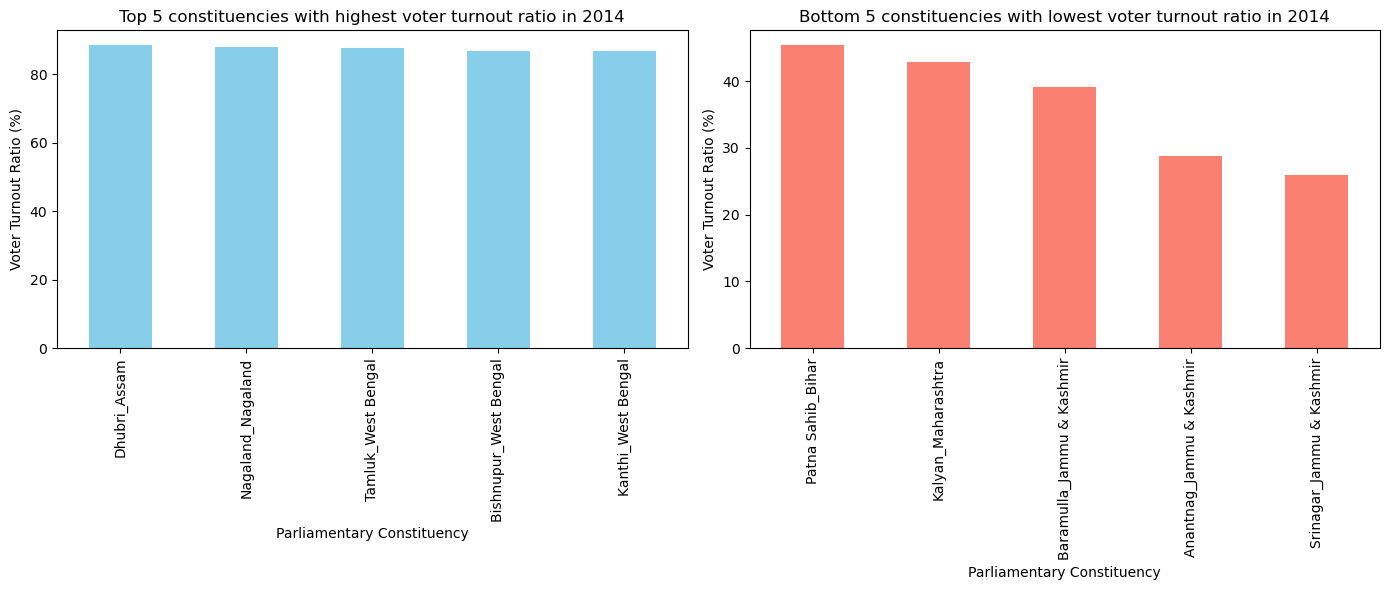

In [718]:
# Top 5 / Bottom 5 constituencies of 2014 in terms of voter turnout ratio

voter_turnout_ratio_2014=round(((df_2014.groupby('pc_name').total_votes.sum())/
                           (df_2014.groupby('pc_name').total_electors.max()))*100,2)         # Calculating voter turn out ratio by constituency
#voter_turnout_ratio_2014

voter_turnout_ratio_sorted_2014 = voter_turnout_ratio_2014.sort_values(ascending=False)      # Sorting voter turn out ratio

top_5_2014 = voter_turnout_ratio_sorted_2014.head(5)                                         # Obtaining top 5 and bottom 5 records
top_5_2014

bottom_5_2014 = voter_turnout_ratio_sorted_2014.tail(5)
bottom_5_2014

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))                                  # Creating a figure with two plots

top_5_2014.plot(kind='bar', ax=axes[0], color='skyblue')                                     # Plotting the top 5 rows
axes[0].set_title('Top 5 constituencies with highest voter turnout ratio in 2014')
axes[0].set_xlabel('Parliamentary Constituency')
axes[0].set_ylabel('Voter Turnout Ratio (%)')

bottom_5_2014.plot(kind='bar', ax=axes[1], color='salmon')                                   # Plotting the bottom 5 rows
axes[1].set_title('Bottom 5 constituencies with lowest voter turnout ratio in 2014')
axes[1].set_xlabel('Parliamentary Constituency')
axes[1].set_ylabel('Voter Turnout Ratio (%)')

plt.tight_layout()                                                                           # Adjusting the layout

plt.show()                                                                                   # Displaying the plots

pc_name
Dhubri_Assam             88.35
Nagaland_Nagaland        87.82
Tamluk_West Bengal       87.59
Bishnupur_West Bengal    86.72
Kanthi_West Bengal       86.61
dtype: float64

pc_name
Patna Sahib_Bihar            45.33
Kalyan_Maharashtra           42.88
Baramulla_Jammu & Kashmir    39.13
Anantnag_Jammu & Kashmir     28.84
Srinagar_Jammu & Kashmir     25.86
dtype: float64

<Axes: xlabel='pc_name'>

Text(0.5, 1.0, 'Top 5 constituencies with highest voter turnout ratio in 2014')

Text(0.5, 0, 'Parliamentary Constituency')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

<Axes: xlabel='pc_name'>

Text(0.5, 1.0, 'Bottom 5 constituencies with lowest voter turnout ratio in 2014')

Text(0.5, 0, 'Parliamentary Constituency')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

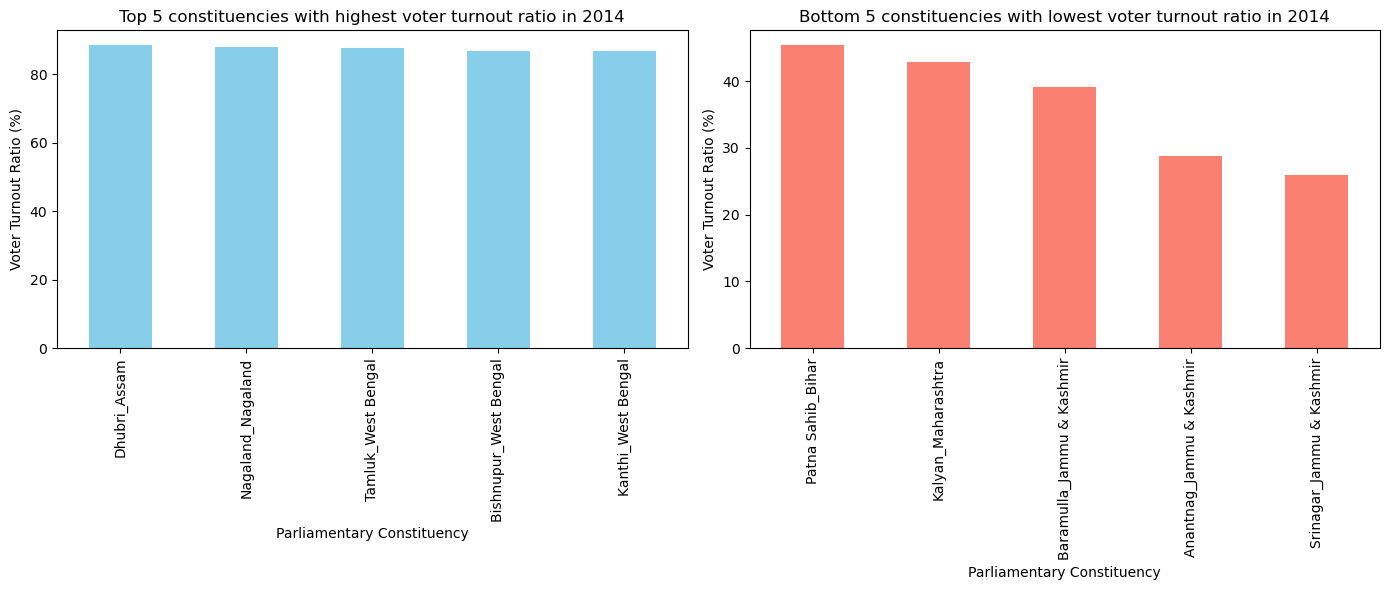

In [718]:
# Top 5 / Bottom 5 constituencies of 2014 in terms of voter turnout ratio

voter_turnout_ratio_2014=round(((df_2014.groupby('pc_name').total_votes.sum())/
                           (df_2014.groupby('pc_name').total_electors.max()))*100,2)         # Calculating voter turn out ratio by constituency
#voter_turnout_ratio_2014

voter_turnout_ratio_sorted_2014 = voter_turnout_ratio_2014.sort_values(ascending=False)      # Sorting voter turn out ratio

top_5_2014 = voter_turnout_ratio_sorted_2014.head(5)                                         # Obtaining top 5 and bottom 5 records
top_5_2014

bottom_5_2014 = voter_turnout_ratio_sorted_2014.tail(5)
bottom_5_2014

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))                                  # Creating a figure with two plots

top_5_2014.plot(kind='bar', ax=axes[0], color='skyblue')                                     # Plotting the top 5 rows
axes[0].set_title('Top 5 constituencies with highest voter turnout ratio in 2014')
axes[0].set_xlabel('Parliamentary Constituency')
axes[0].set_ylabel('Voter Turnout Ratio (%)')

bottom_5_2014.plot(kind='bar', ax=axes[1], color='salmon')                                   # Plotting the bottom 5 rows
axes[1].set_title('Bottom 5 constituencies with lowest voter turnout ratio in 2014')
axes[1].set_xlabel('Parliamentary Constituency')
axes[1].set_ylabel('Voter Turnout Ratio (%)')

plt.tight_layout()                                                                           # Adjusting the layout

plt.show()                                                                                   # Displaying the plots

pc_name
Dhubri_Assam                        90.66
Bishnupur_West Bengal               87.31
Barpeta_Assam                       86.55
Jalpaiguri_West Bengal              86.49
ARUNACHAL EAST_Arunachal Pradesh    86.46
dtype: float64

pc_name
Kalyan_Maharashtra           45.29
Hyderabad_Telangana          44.84
Baramulla_Jammu & Kashmir    34.57
Srinagar_Jammu & Kashmir     14.43
Anantnag_Jammu & Kashmir      8.94
dtype: float64

<Axes: xlabel='pc_name'>

Text(0.5, 1.0, 'Top 5 constituencies with highest voter turnout ratio in 2019 ')

Text(0.5, 0, 'Parliamentary Constituency')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

<Axes: xlabel='pc_name'>

Text(0.5, 1.0, 'Bottom 5 constituencies with lowest voter turnout ratio in 2019')

Text(0.5, 0, 'Parliamentary Constituency')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

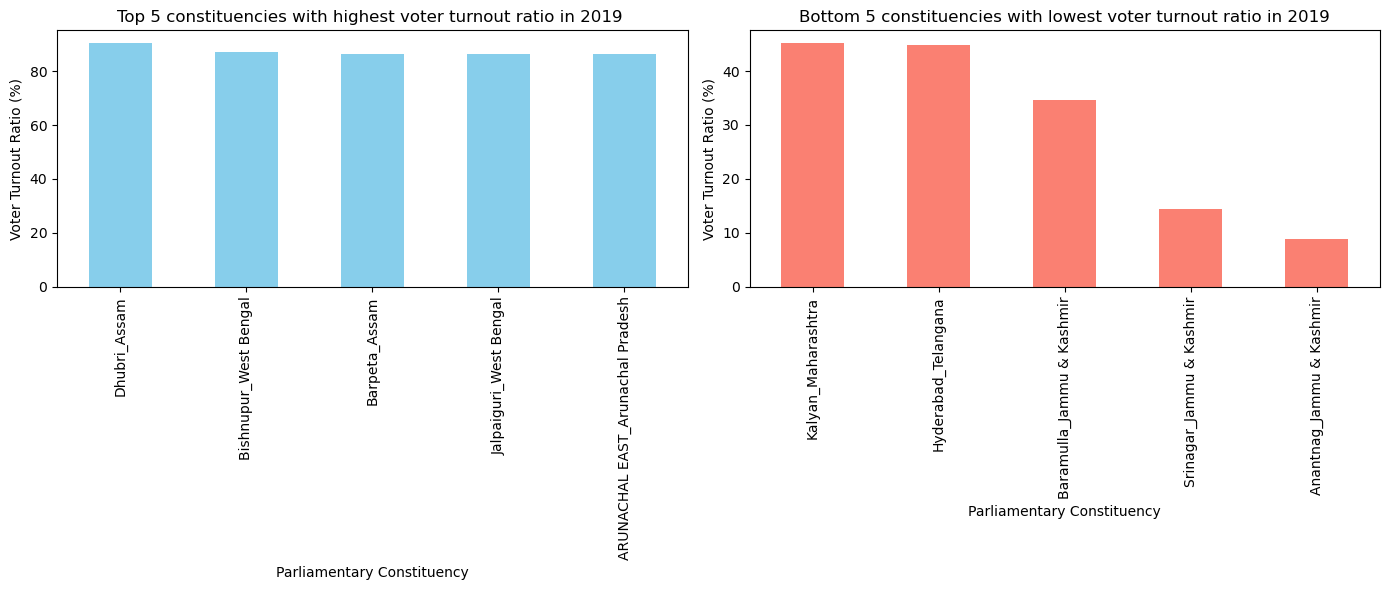

In [719]:
# Top 5 / Bottom 5 constituencies of 2019 in terms of voter turnout ratio

voter_turnout_ratio_2019=round(((df_2019.groupby('pc_name').total_votes.sum())/
                           (df_2019.groupby('pc_name').total_electors.max()))*100,2)         # Calculating voter turn out ratio by constituency

voter_turnout_ratio_sorted_2019 = voter_turnout_ratio_2019.sort_values(ascending=False)      # Sorting voter turn out ratio

top_5_2019 = voter_turnout_ratio_sorted_2019.head(5)                                         # Obtaining top 5 and bottom 5 records
top_5_2019
bottom_5_2019 = voter_turnout_ratio_sorted_2019.tail(5)
bottom_5_2019

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))                                  # Creating a figure with two plots

top_5_2019.plot(kind='bar', ax=axes[0], color='skyblue')                                     # Plotting the top 5 rows
axes[0].set_title('Top 5 constituencies with highest voter turnout ratio in 2019 ')
axes[0].set_xlabel('Parliamentary Constituency')
axes[0].set_ylabel('Voter Turnout Ratio (%)')

bottom_5_2019.plot(kind='bar', ax=axes[1], color='salmon')                                   # Plotting the bottom 5 rows
axes[1].set_title('Bottom 5 constituencies with lowest voter turnout ratio in 2019')
axes[1].set_xlabel('Parliamentary Constituency')
axes[1].set_ylabel('Voter Turnout Ratio (%)')

plt.tight_layout()                                                                           # Adjusting the layout

plt.show()                                                                                   # Displaying the plots

## 2. List top 5/bottom 5 states of 2014 and 2019 in terms of voter turnout ratio

state
Nagaland                87.82
Lakshadweep             86.61
Tripura                 84.72
Dadra & Nagar Haveli    84.07
Sikkim                  83.33
dtype: float64

state
Madhya Pradesh     61.59
Maharashtra        61.50
Uttar Pradesh      59.92
Bihar              56.25
Jammu & Kashmir    49.66
dtype: float64

<Axes: xlabel='state'>

Text(0.5, 1.0, 'Top 5 states with highest voter turnout ration in 2014')

Text(0.5, 0, 'state')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

<Axes: xlabel='state'>

Text(0.5, 1.0, 'Bottom 5 states with lowest voter turnout ratio in 2014')

Text(0.5, 0, 'state')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

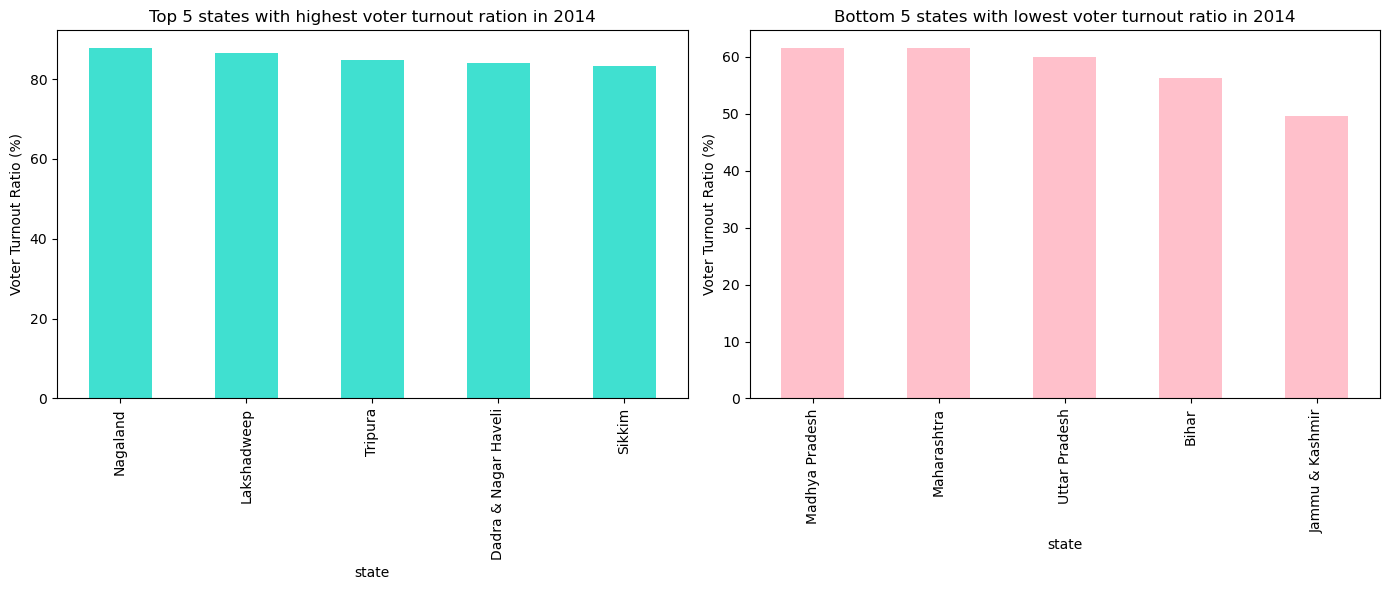

In [720]:
# Top 5/ Bottom 5 states of 2019 in terms of voter turnout ratio
                                                                                
unique_df_2014 = df_2014.drop_duplicates(subset=['pc_name'])                                    # Dropping duplicate rows based on pc_name column
#unique_df

total_electors_by_state_2014 = unique_df_2014.groupby('state')['total_electors'].sum()          # Calculating total electors by state
#print(total_electors_by_state)

total_votes_by_states_2014 = df_2014.groupby('state')['total_votes'].sum()                      # Calculating total votes by state
#total_votes_by_states

voter_turnout_ratio_2014=round((total_votes_by_states/total_electors_by_state)*100,2)           # Calculating voter turnout ratio
#voter_turnout_ratio_2014

voter_turnout_ratio_2014_sorted = voter_turnout_ratio_2014.sort_values(ascending=False)         # Sorting voter turn out ratio

top_5_2014 = voter_turnout_ratio_2014_sorted.head(5)                                            # Obtaining top 5 and bottom 5 records
top_5_2014
bottom_5_2014 = voter_turnout_ratio_2014_sorted.tail(5)
bottom_5_2014

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))                                     # Creating a figure with two plots

top_5_2014.plot(kind='bar', ax=axes[0], color='turquoise')                                      # Plotting the top 5 rows
axes[0].set_title('Top 5 states with highest voter turnout ration in 2014')
axes[0].set_xlabel('state')
axes[0].set_ylabel('Voter Turnout Ratio (%)')
 
bottom_5_2014.plot(kind='bar', ax=axes[1], color='pink')                                        # Plotting the bottom 5 rows
axes[1].set_title('Bottom 5 states with lowest voter turnout ratio in 2014')
axes[1].set_xlabel('state')
axes[1].set_ylabel('Voter Turnout Ratio (%)')

plt.tight_layout()                                                                              # Adjusting the layout

plt.show()                                                                                      # Displaying the plots

state
Lakshadweep    85.18
Nagaland       82.91
Manipur        82.54
Tripura        82.35
West Bengal    81.72
dtype: float64

state
Maharashtra        60.96
NCT OF Delhi       60.58
Uttar Pradesh      59.18
Bihar              57.30
Jammu & Kashmir    44.84
dtype: float64

<Axes: xlabel='state'>

Text(0.5, 1.0, 'Top 5 states with highest voter turnout ration in 2019')

Text(0.5, 0, 'state')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

<Axes: xlabel='state'>

Text(0.5, 1.0, 'Bottom 5 states with lowest voter turnout ratio in 2019')

Text(0.5, 0, 'state')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

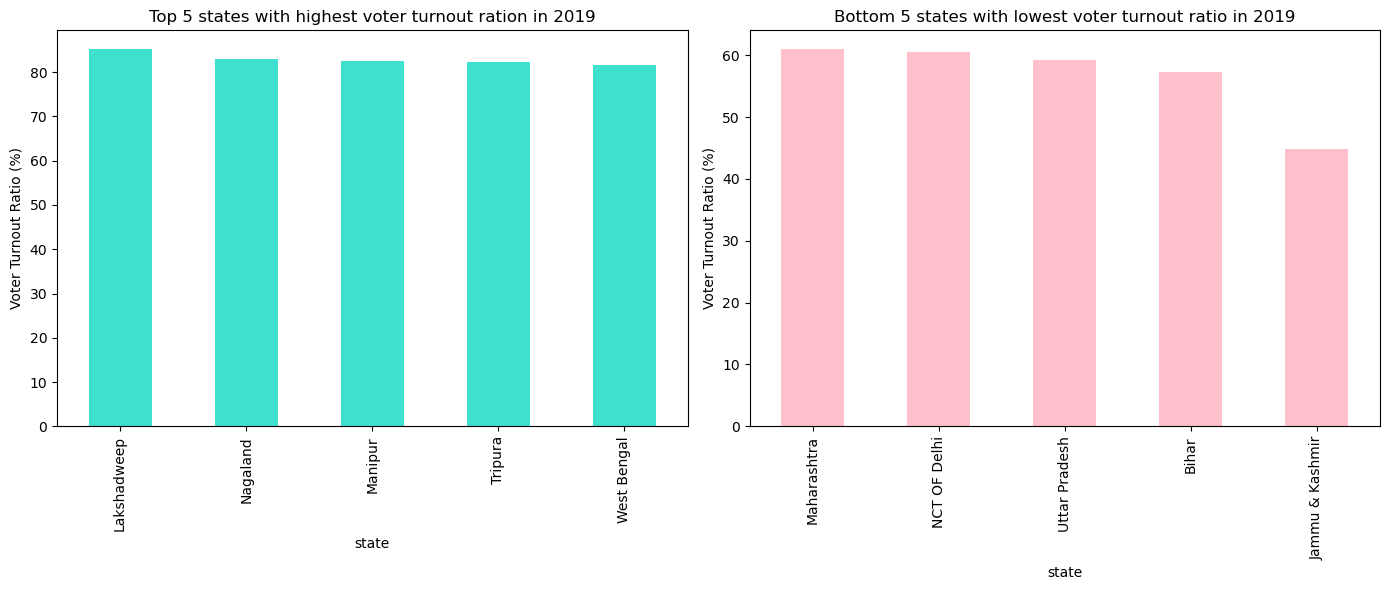

In [795]:
# Top 5/ Bottom 5 states of 2019 in terms of voter turnout ratio

unique_df_2019 = df_2019.drop_duplicates(subset=['pc_name'])                                      # Dropping duplicate rows based on pc_name column
#unique_df

total_electors_by_state_2019 = unique_df_2019.groupby('state')['total_electors'].sum()            # Calculating total electors by state
#print(total_electors_by_state)

total_votes_by_states_2019 = df_2019.groupby('state')['total_votes'].sum()                        # Calculating total votes by state
#total_votes_by_states

voter_turnout_ratio_2019=round((total_votes_by_states_2019/total_electors_by_state_2019)*100,2)             # Calculating voter turn out ratio
#voter_turnout_ratio_2019

voter_turnout_ratio_2019_sorted = voter_turnout_ratio_2019.sort_values(ascending=False)           # Sorting voter turn out ratio

top_5_2019 = voter_turnout_ratio_2019_sorted.head(5)                                              # Obtaining top 5 and bottom 5 records
top_5_2019
bottom_5_2019 = voter_turnout_ratio_2019_sorted.tail(5)
bottom_5_2019

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))                                       # Creating a figure with two plots

top_5_2019.plot(kind='bar', ax=axes[0], color='turquoise')                                        # Plotting the top 5 rows
axes[0].set_title('Top 5 states with highest voter turnout ration in 2019')
axes[0].set_xlabel('state')
axes[0].set_ylabel('Voter Turnout Ratio (%)')
 
bottom_5_2019.plot(kind='bar', ax=axes[1], color='pink')                                          # Plotting the bottom 5 rows
axes[1].set_title('Bottom 5 states with lowest voter turnout ratio in 2019')
axes[1].set_xlabel('state')
axes[1].set_ylabel('Voter Turnout Ratio (%)')

plt.tight_layout()                                                                                # Adjusting the layout

plt.show()                                                                                        # Displaying the plots

(0.0, 1.0, 0.0, 1.0)

Text(0.5, 1.0, 'Voter turnout ratio per state in 2019')

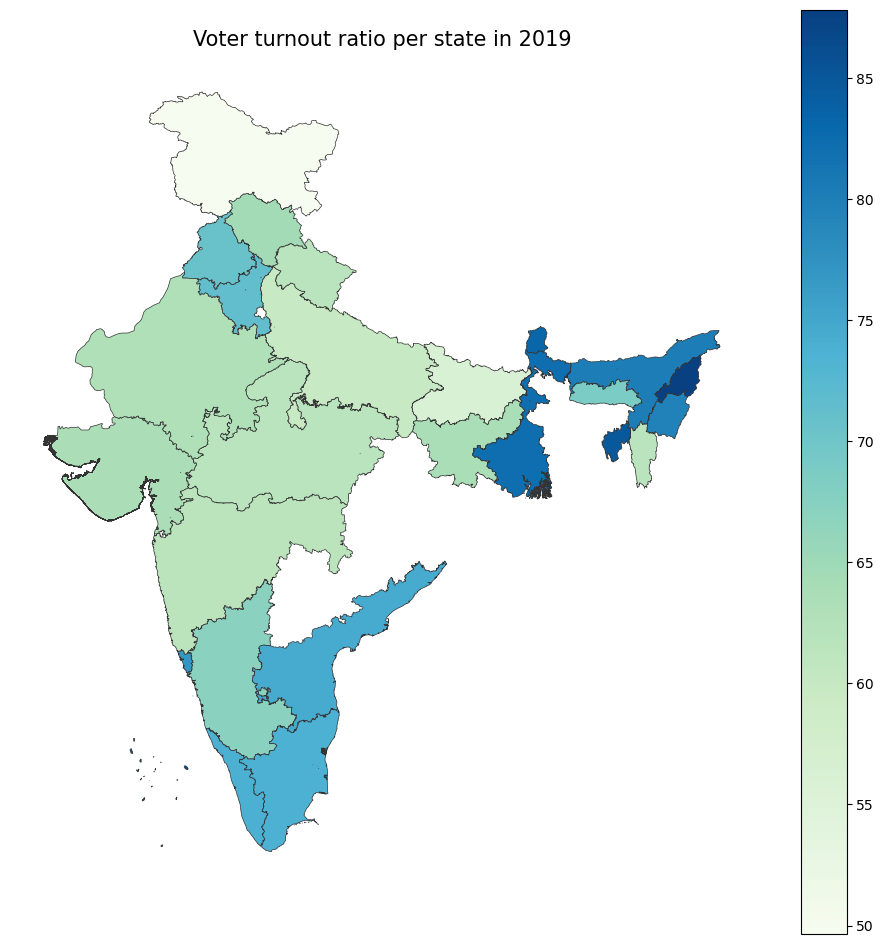

In [784]:
#Reading indian states shape file
shp_gdf = gpd.read_file(r"C:\Users\91961\Downloads\India States\Indian_states.shp")  
#shp_gdf.head()

#Converting voter turn out ratio series into a dataframe with columns state & voter turnout ratio
df_sorted = pd.DataFrame({"State": voter_turnout_ratio_2019_sorted.index, "Voter Turnout Ratio": voter_turnout_ratio_2019_sorted.values})
#print(df_sorted.head())

#merging shape df and voter turnout ration df using state column
merged = shp_gdf.set_index('st_nm').join(df_sorted.set_index('State'))
#merged.head()

#Plotting choropleth map
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Voter turnout ratio per state in 2019',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='Voter Turnout Ratio', cmap='GnBu', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
plt.show()

## 3. Which constituencies have elected the same party for two consecutive elections, rank them by % of votes to that winning party in 2019

In [432]:

winning_party_2014_df=df_2014.loc[df_2014.groupby('pc_name')['total_votes'].idxmax()]     #Filtering 2014 data to obtain winning party per constituency

winning_party_2019_df=df_2019.loc[df_2019.groupby('pc_name')['total_votes'].idxmax()]     #Filtering 2019 data to obtain winning party per constituency

merged_df = pd.merge(winning_party_2014_df,winning_party_2019_df,on='pc_name',suffixes=('_2014','_2019')) # Merging 2014 & 2019 datframes by pc_name

matched_parties_df = merged_df[merged_df['party_2014'] == merged_df['party_2019']]        # Filtering the rows where party names match in both years

matched_parties_df['percentage_change'] = ((matched_parties_df['total_votes_2019'] -      # Calculating percentage change in votes from 2014 to 2019
                                            matched_parties_df['total_votes_2014']) /
                                           matched_parties_df['total_votes_2019']) * 100

ranked_df = matched_parties_df.sort_values(by='percentage_change', ascending=False)       # Sorting constituencies based on percentage change in votes

print(ranked_df[['pc_name', 'party_2014','total_votes_2014','party_2019','total_votes_2019', 'percentage_change']])

                     pc_name party_2014  total_votes_2014 party_2019  \
407    Samastipur (SC)_Bihar        LJP            270401        LJP   
261        Kodarma_Jharkhand        BJP            365410        BJP   
417       Shillong_Meghalaya        INC            209340        INC   
488           Wayanad_Kerala        INC            377035        INC   
129          Darbhanga_Bihar        BJP            314949        BJP   
..                       ...        ...               ...        ...   
409       Sangli_Maharashtra        BJP            611563        BJP   
128  Daman & diu_Daman & Diu        BJP             46960        BJP   
410           Sangrur_Punjab       AAAP            533237       AAAP   
262          Kokrajhar_Assam        IND            634428        IND   
260         Kishanganj_Bihar        INC            493461        INC   

     total_votes_2019  percentage_change  
407            562443          51.923839  
261            753016          51.473807  
417   

C:\Users\91961\AppData\Local\Temp\ipykernel_14824\1297819329.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1200x800 with 0 Axes>

Text(0.5, 0, 'Constituency-Party')

Text(0, 0.5, 'Percentage Change in Votes')

Text(0.5, 1.0, 'Constituencies that elected same party for consecutive years by % Change in Votes')

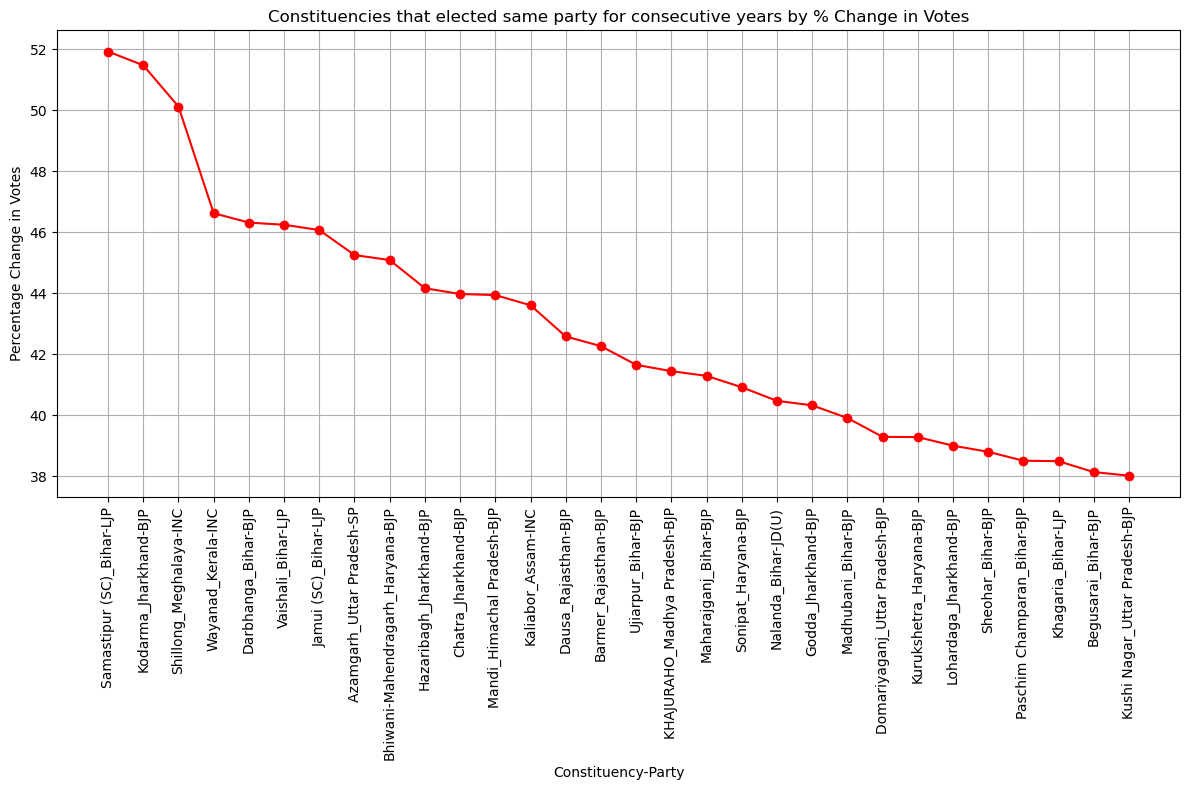

In [567]:
#Plotting constituencies that elected same party for consecutive years by % Change in Votes

filtered_ranked_df=ranked_df.head(30)                                                                # Filtering first 30 rows

labels = [f"{constituency}-{party}" for constituency, party in 
          zip(filtered_ranked_df['pc_name'], filtered_ranked_df['party_2014'])]                      # Concatenating constituency and party for labels

plt.figure(figsize=(12, 8))
plt.plot(labels,filtered_ranked_df['percentage_change'], color='red', marker='o')                    # Plotting a line chart
plt.xlabel('Constituency-Party')
plt.ylabel('Percentage Change in Votes')
plt.title('Constituencies that elected same party for consecutive years by % Change in Votes')
plt.tick_params(axis='x', labelrotation=90) 
plt.grid(True)
plt.tight_layout()                                                                                   # Adjusting layout to prevent trimming of labels
plt.show()

## 4. Which constituencies have voted for different partiesin two elections (list top 10 based on the difference (2019-2014) in voter percentage in two elections)

In [434]:


winning_party_2014_df=df_2014.loc[df_2014.groupby('pc_name')['total_votes'].idxmax()]     #Filtering 2014 data to obtain winning party per constituency

winning_party_2019_df=df_2019.loc[df_2019.groupby('pc_name')['total_votes'].idxmax()]     #Filtering 2019 data to obtain winning party per constituency

merged_df = pd.merge(winning_party_2014_df, winning_party_2019_df, on='pc_name', suffixes=('_2014', '_2019'))  # Matching pc_names  from 2014 and 2019

merged_df['max_total_votes']=merged_df[['total_votes_2014','total_votes_2019']].max(axis=1)   # Finding the maximum total votes between 2014 and 2019

different_parties_df = merged_df[merged_df['party_2014'] != merged_df['party_2019']]        # Filtering the rows where party names match in both years

different_parties_df['percentage_change'] = ((different_parties_df['total_votes_2019'] -      # Calculating percentage change in votes from 2014 to 2019
                                            different_parties_df['total_votes_2014']) /
                                           different_parties_df['max_total_votes']) * 100

different_ranked_df = different_parties_df.sort_values(by='percentage_change', ascending=False)    # Sorting constituencies based on % change in votes

print(different_ranked_df[['pc_name', 'party_2014','total_votes_2014','party_2019','total_votes_2019', 'percentage_change']])

                       pc_name party_2014  total_votes_2014 party_2019  \
12     Alipurduars_West Bengal       AITC            362453        BJP   
173     Ghazipur_Uttar Pradesh        BJP            306929        BSP   
408      Sambhal_Uttar Pradesh        BJP            360242         SP   
222          Jhanjharpur_Bihar        BJP            335481      JD(U)   
440               Supaul_Bihar        INC            332927      JD(U)   
..                         ...        ...               ...        ...   
69   Baramulla_Jammu & Kashmir      JKPDP            175277        JKN   
40      Aurangabad_Maharashtra        SHS            520902      AIMIM   
330          Nagaland_Nagaland        NPF            713372       NDPP   
437   Srinagar_Jammu & Kashmir      JKPDP            157923        JKN   
28    Anantnag_Jammu & Kashmir      JKPDP            200429        JKN   

     total_votes_2019  percentage_change  
12             750804          51.724684  
173            566082    

C:\Users\91961\AppData\Local\Temp\ipykernel_14824\2210152090.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1200x800 with 0 Axes>

Text(0.5, 0, 'Constituency-Party')

Text(0, 0.5, 'Percentage Change in Votes')

Text(0.5, 1.0, 'Percentage Change in Votes from 2014 to 2019 by Constituency-Party Pair')

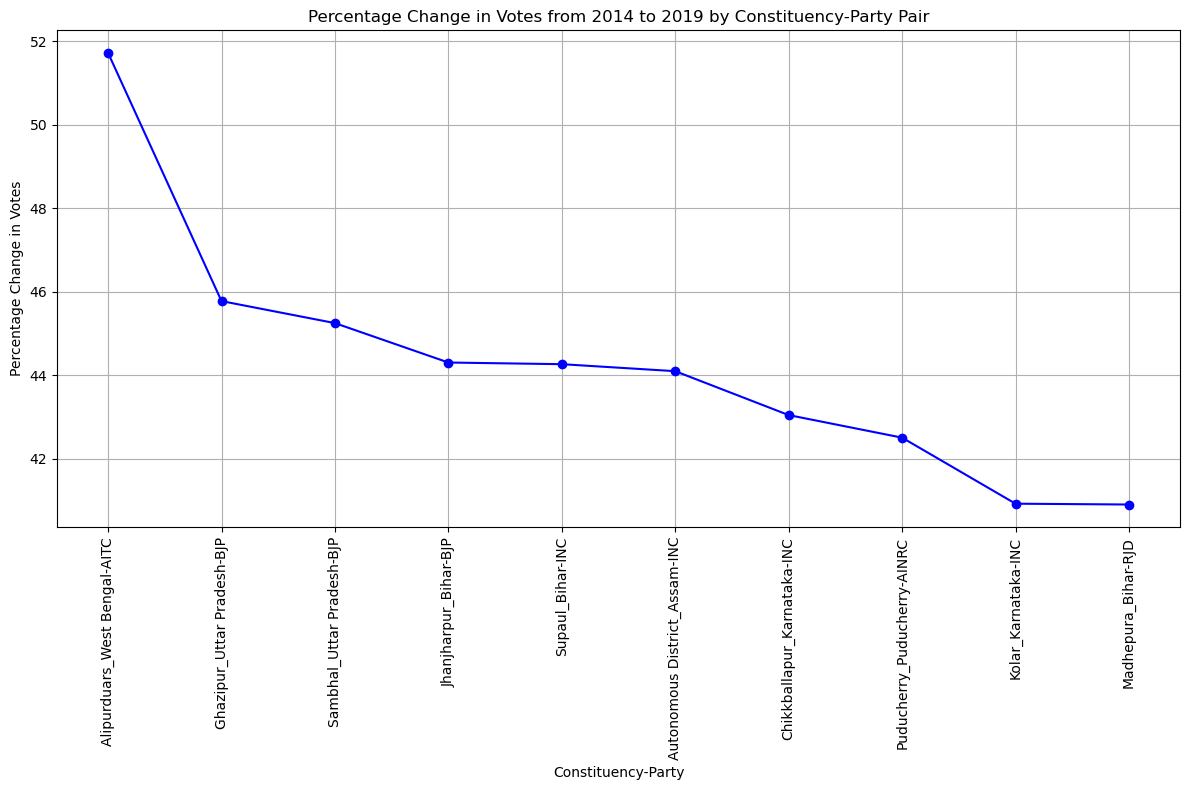

In [796]:
#Percentage Change in Votes from 2014 to 2019 by Constituency-Party Pair

filtered_ranked2_df=different_ranked_df.head(10)                                                     # Filtering first 30 rows

labels = [f"{constituency}-{party}" for constituency, party in 
          zip(filtered_ranked2_df['pc_name'], filtered_ranked2_df['party_2014'])]                    # Concatenating constituency and party for labels

plt.figure(figsize=(12, 8))
plt.plot(labels,filtered_ranked2_df['percentage_change'],color='blue',marker='o')                   # Plotting line chart
plt.xlabel('Constituency-Party')
plt.ylabel('Percentage Change in Votes')
plt.title('Percentage Change in Votes from 2014 to 2019 by Constituency-Party Pair')
plt.tick_params(axis='x', labelrotation=90)  
plt.grid(True)
plt.tight_layout()                                                                                   # Adjusting layout to prevent trimming of labels
plt.show()

## 5. Top 5 candidates based on margin difference with runners in 2014 and 2019.

In [794]:

# Calculating the margin difference between the winner and runner for each constituency in 2014
winner_runner_margin_2014 = df_2014.groupby('pc_name').apply(lambda x: x.nlargest(2, 'total_votes', 'all')).reset_index(drop=True)
winner_runner_margin_2014['margin_difference'] = winner_runner_margin_2014.groupby('pc_name')['total_votes'].diff().abs()

# Sorting candidates based on margin difference and selecting top 5 candidates
top_5_candidates_2014 = winner_runner_margin_2014.nlargest(5, 'margin_difference')

print("Top 5 candidates based on margin difference with runners in 2014:")
print(top_5_candidates_2014[['pc_name', 'candidate', 'party', 'total_votes', 'margin_difference']])

#------------------------------------------------------------------------------------------------------------------------------------------------------#

# Calculating the margin difference between the winner and runner for each constituency in 2019
winner_runner_margin_2019 = df_2019.groupby('pc_name').apply(lambda x: x.nlargest(2, 'total_votes', 'all')).reset_index(drop=True)
winner_runner_margin_2019['margin_difference'] = winner_runner_margin_2019.groupby('pc_name')['total_votes'].diff().abs()

# Sorting candidates based on margin difference and selecting top 5 candidates
top_5_candidates_2019 = winner_runner_margin_2019.nlargest(5, 'margin_difference')

print("Top 5 candidates based on margin difference with runners in 2019:")
print(top_5_candidates_2019[['pc_name', 'candidate', 'party', 'total_votes', 'margin_difference']])

Top 5 candidates based on margin difference with runners in 2014:
                     pc_name                      candidate party  \
989         Vadodara_Gujarat       MISTRI MADHUSUDAN DEVRAM   INC   
357  Ghaziabad_Uttar Pradesh                     RAJ BABBAR   INC   
721          Navsari_Gujarat                   MAKSUD MIRZA   INC   
433         Jaipur_Rajasthan               DR. MAHESH JOSHI   INC   
921            Surat_Gujarat  DESAI NAISHADHBHAI BHUPATBHAI   INC   

     total_votes  margin_difference  
989       275336           570128.0  
357       191222           567260.0  
721       262715           558116.0  
433       324013           539345.0  
921       185222           533190.0  
Top 5 candidates based on margin difference with runners in 2019:
                 pc_name                    candidate party  total_votes  \
771      Navsari_Gujarat  PATEL DHARMESHBHAI BHIMBHAI   INC       283071   
557       Karnal_Haryana                Kuldip Sharma   INC       255452 

In [767]:

# Creating copies of the dataframes
df_2014_margin_difference = df_2014.copy()
df_2019_margin_difference = df_2019.copy()

# Calculating margin difference for each candidate in 2014 by constituency
df_2014_margin_difference['margin_difference_2014'] = df_2014_margin_difference.groupby('pc_name')['total_votes'].transform(lambda x: x.max() - x.shift(-1))
df_2014_margin_difference

# Calculating margin difference for each candidate in 2019 by constituency
df_2019_margin_difference['margin_difference_2019'] = df_2019_margin_difference.groupby('pc_name')['total_votes'].transform(lambda x: x.max() - x.shift(-1))

# Sorting candidates based on margin difference in 2014
top_candidates_2014 = df_2014_margin_difference.sort_values(by='margin_difference_2014',ascending=False).head(5)

# Sorting candidates based on margin difference in 2019
top_candidates_2019 = df_2019_margin_difference.sort_values(by='margin_difference_2019',ascending=False).head(5)

print("Top 5 Candidates based on Margin Difference in 2014:")
print(top_candidates_2014[['pc_name', 'candidate', 'party', 'margin_difference_2014']])
print("\nTop 5 Candidates based on Margin Difference in 2019:")
print(top_candidates_2019[['pc_name', 'candidate', 'party', 'margin_difference_2019']])


,state,pc_name,candidate,sex,age,category,party,party_symbol,general_votes,postal_votes,total_votes,total_electors,margin_difference_2014
0,Telengana,Adilabad _Telengana,GODAM NAGESH,M,49.0,ST,TRS,Car,425762,5085,430847,1386282,171290.0
1,Telengana,Adilabad _Telengana,NARESH,M,37.0,ST,INC,Hand,257994,1563,259557,1386282,246649.0
2,Telengana,Adilabad _Telengana,RAMESH RATHOD,M,48.0,ST,TDP,Bicycle,182879,1319,184198,1386282,336427.0
3,Telengana,Adilabad _Telengana,RATHOD SADASHIV,M,55.0,ST,BSP,Elephant,94363,57,94420,1386282,389815.0
4,Telengana,Adilabad _Telengana,NETHAWATH RAMDAS,M,44.0,ST,IND,Auto- Rickshaw,41028,4,41032,1386282,425792.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8350,Puducherry,Puducherry_Puducherry,PUVALA NAGESWARA RAO,M,60.0,GEN,IND,Sewing Machine,465,0,465,901357,255059.0
8351,Puducherry,Puducherry_Puducherry,K. MANJINI,M,41.0,GEN,IND,Coconut,767,0,767,901357,255329.0
8352,Puducherry,Puducherry_Puducherry,R. VALAVAN,M,40.0,GEN,IND,Carrom Board,497,0,497,901357,255080.0
8353,Puducherry,Puducherry_Puducherry,V. VIJAYA,F,29.0,GEN,IND,Green Chilli,746,0,746,901357,233558.0


Top 5 Candidates based on Margin Difference in 2014:
               pc_name            candidate party  margin_difference_2014
4719  Jaipur_Rajasthan      IFTEKAR QURISHI  AIFB                862792.0
4718  Jaipur_Rajasthan  ABDUL AZIZ BHARTIYA   RUC                862737.0
4720  Jaipur_Rajasthan  KAILASH CHAND SAINI   HJP                862465.0
4717  Jaipur_Rajasthan    ANIL KUMAR SHARMA   JGP                862255.0
4721  Jaipur_Rajasthan           DR. TANMAY  IPGP                861792.0

Top 5 Candidates based on Margin Difference in 2019:
                    pc_name                  candidate  party  \
3137  INDORE_Madhya Pradesh    RAJENDRA AGARWAL 'RAJU'  SP(I)   
3135  INDORE_Madhya Pradesh     DHEERAJ DUBEY PATRAKAR  SPAKP   
3139  INDORE_Madhya Pradesh           PARMANAND TOLANI    IND   
3136  INDORE_Madhya Pradesh  BHAVANA KISHORE SANGELIYA    JAC   
3134  INDORE_Madhya Pradesh           KAMLESH VAISHNAV    HND   

      margin_difference_2019  
3137               1068146.

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 5 artists>

<BarContainer object of 5 artists>

Text(0.5, 0, 'Candidates')

([<matplotlib.axis.XTick at 0x1e7f8335510>,
 [Text(0.175, 0, 'IFTEKAR QURISHI'),
  Text(1.175, 0, 'ABDUL AZIZ BHARTIYA'),
  Text(2.175, 0, 'KAILASH CHAND SAINI'),
  Text(3.175, 0, 'ANIL KUMAR SHARMA'),
  Text(4.175, 0, 'DR. TANMAY')])

Text(0, 0.5, 'Margin Difference')

Text(0.5, 1.0, 'Margin Difference of Top 5 Candidates (2014 vs 2019)')

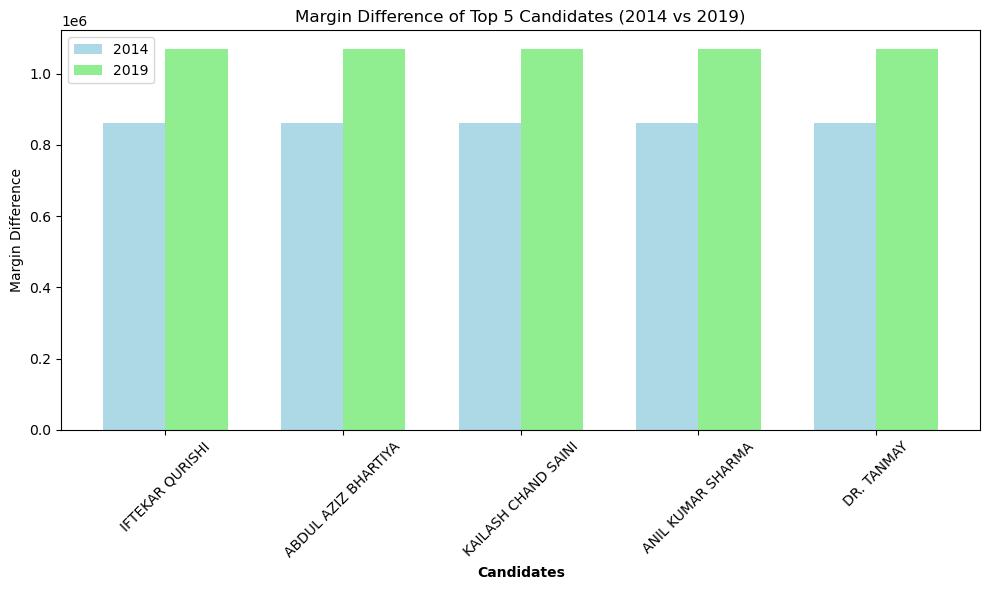

In [765]:


candidates_2014 = top_candidates_2014[['candidate', 'margin_difference_2014']]             # Sample data for top 5 candidates in 2014 and 2019
candidates_2019 = top_candidates_2019[['candidate', 'margin_difference_2019']]

candidates_2014_names = candidates_2014['candidate']                                       # Extracting candidate names and margin differences
candidates_2019_names = candidates_2019['candidate']
margin_difference_2014 = candidates_2014['margin_difference_2014']
margin_difference_2019 = candidates_2019['margin_difference_2019']

bar_width = 0.35                                                                           # Defining the width of the bars

r1 = np.arange(len(candidates_2014))                                                       # Setting the positions of the bars on the x-axis
r2 = [x + bar_width for x in r1]
  
plt.figure(figsize=(10, 6))                                                                # Creating a grouped bar chart
plt.bar(r1, margin_difference_2014, color='lightblue', width=bar_width, label='2014')    
plt.bar(r2, margin_difference_2019, color='lightgreen', width=bar_width, label='2019')

plt.xlabel('Candidates', fontweight='bold')                                                # Add xticks on the middle of the group bars
plt.xticks([r + bar_width/2 for r in range(len(candidates_2014))],candidates_2014_names,rotation=45)

plt.ylabel('Margin Difference')                                                            # Add ylabel and title
plt.title('Margin Difference of Top 5 Candidates (2014 vs 2019)')

plt.legend()                                                                               # Add legend

plt.tight_layout()                                                                         # Show plot
plt.show()


## 6. % Split of votes of parties between 2014 vs 2019 at national level

In [436]:

party_votes_2014_df=df_2014.groupby('party')['total_votes'].sum().reset_index()                   # Calcualting total votes gained by a party
total_votes_2014=party_votes_2014_df['total_votes'].sum()                                         # Calculating total votes gained by all parties
party_votes_2014_df['vote_share_2014']=(party_votes_2014_df['total_votes']/total_votes_2014)*100  # Calculating vote share of each party
sorted_2014_df = party_votes_2014_df.sort_values(by='vote_share_2014', ascending=False).head(10)  # Sorting and filtering first 10 parties 

party_votes_2019_df=df_2019.groupby('party')['total_votes'].sum().reset_index()
total_votes_2019=party_votes_2019_df['total_votes'].sum()
party_votes_2019_df['vote_share_2019']=(party_votes_2019_df['total_votes']/total_votes_2019)*100
sorted_2019_df = party_votes_2019_df.sort_values(by='vote_share_2019', ascending=False).head(10)

([<matplotlib.patches.Wedge at 0x1e7d03c2990>,
 [Text(0.33131249066853685, 1.048919459981085, 'BJP'),
  Text(-1.0881159571970074, -0.16125651519625767, 'INC'),
  Text(-0.5161934440618801, -0.9713620994806905, 'BSP'),
  Text(-0.15963830520423491, -1.0883545431115358, 'AITC'),
  Text(0.18319859484165826, -1.0846373932554796, 'SP'),
  Text(0.4843061449015747, -0.9876474867130351, 'ADMK'),
  Text(0.7409360610717334, -0.8130275231525098, 'CPM'),
  Text(0.9284054447217314, -0.5899689230892118, 'IND'),
  Text(1.0404425972264781, -0.35704229704143015, 'TDP'),
  Text(1.0933614662636568, -0.12066774254035939, 'YSRCP')],
 [Text(0.2560141973347784, 0.8105286736217474, '40.3%'),
  Text(-0.8408168760158692, -0.12460730719710819, '24.2%'),
  Text(-0.39887675222963453, -0.7505979859623517, '5.6%'),
  Text(-0.1233568722032724, -0.8410012378589139, '5.3%'),
  Text(0.14156255055946318, -0.8381288947883251, '4.7%'),
  Text(0.37423656651485315, -0.7631821488237089, '4.5%'),
  Text(0.5725415017372485, -0.62

Text(0.5, 1.0, 'Vote Share by Party in 2014')

([<matplotlib.patches.Wedge at 0x1e7d0fc1fd0>,
 [Text(0.08964330717215224, 1.0963412231049416, 'BJP'),
  Text(-0.8992998831742551, -0.6334506453724484, 'INC'),
  Text(-0.020065193692785237, -1.099816979320683, 'AITC'),
  Text(0.31290748286764153, -1.054556260787179, 'BSP'),
  Text(0.5663743222819226, -0.942984690787551, 'IND'),
  Text(0.7501266862375007, -0.8045557498361107, 'SP'),
  Text(0.8967547449653347, -0.6370486067657302, 'YSRCP'),
  Text(1.002917861923911, -0.4518359904146318, 'DMK'),
  Text(1.0667985508247313, -0.26821791878667134, 'SHS'),
  Text(1.096361169162303, -0.0893990310521787, 'TDP')],
 [Text(0.06926982826939036, 0.8471727633083639, '47.4%'),
  Text(-0.6949135460891971, -0.48948458960598284, '24.7%'),
  Text(-0.015504922398970408, -0.8498585749296185, '5.2%'),
  Text(0.2417921458522684, -0.8148843833355475, '4.6%'),
  Text(0.4376528853996674, -0.7286699883358347, '3.4%'),
  Text(0.5796433484562504, -0.6217021703279036, '3.2%'),
  Text(0.6929468483823039, -0.4922648325

Text(0.5, 1.0, 'Vote Share by Party in 2019')

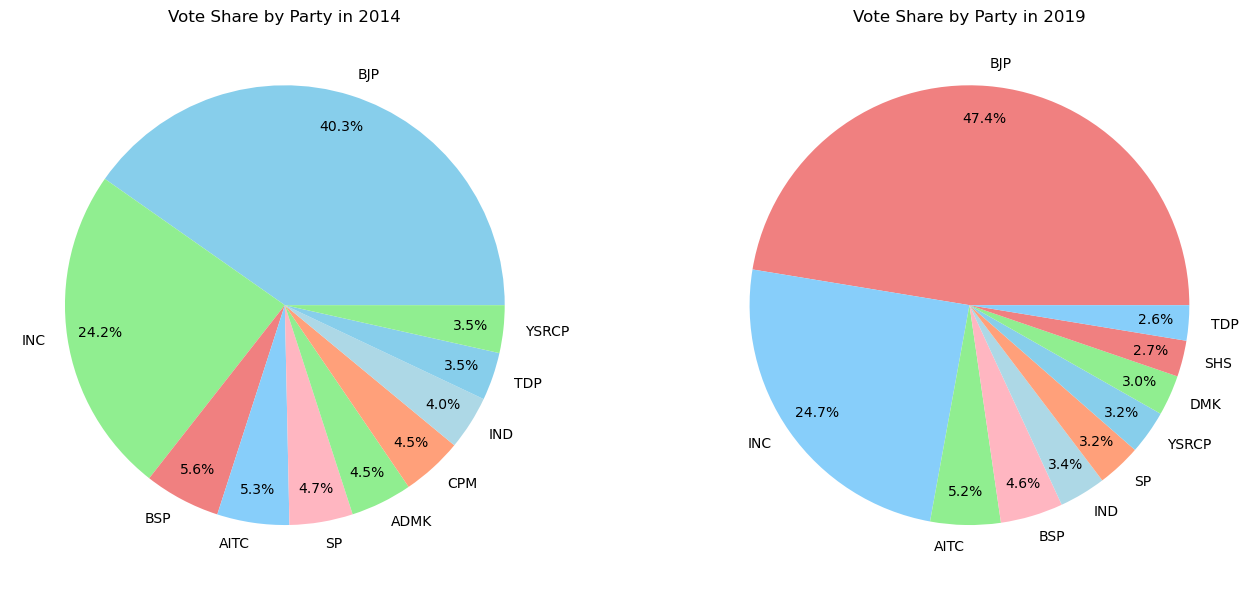

In [538]:
# Creating two subplots one for 2014 and other for 2019 showing top 10 parties and their respective vote share

labels_2014 = sorted_2014_df['party']
sizes_2014 = sorted_2014_df['vote_share_2014']

labels_2019 = sorted_2019_df['party']
sizes_2019 = sorted_2019_df['vote_share_2019']

colors_2014 = ['skyblue','lightgreen','lightcoral','lightskyblue','lightpink','lightgreen','lightsalmon','lightblue']
colors_2019 = ['lightcoral','lightskyblue','lightgreen','lightpink','lightblue','lightsalmon','skyblue','lightgreen']

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(14, 6))                               

axes[0].pie(sizes_2014,labels=labels_2014,autopct='%1.1f%%',pctdistance=0.85,colors=colors_2014)        # Plotting a pie chart
axes[0].set_title('Vote Share by Party in 2014')

axes[1].pie(sizes_2019,labels=labels_2019,autopct='%1.1f%%',pctdistance=0.85,colors=colors_2019)
axes[1].set_title('Vote Share by Party in 2019')

plt.tight_layout()                                                                         

plt.show()          


## 7. % Split of votes of parties between 2014 vs 2019 at state level

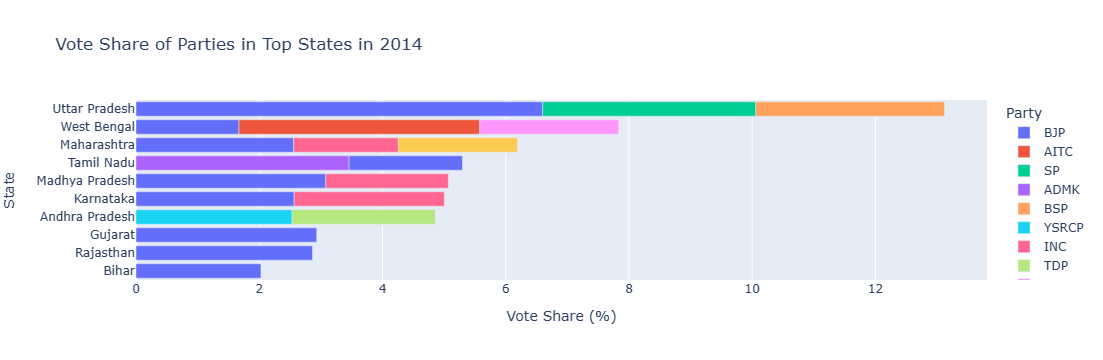

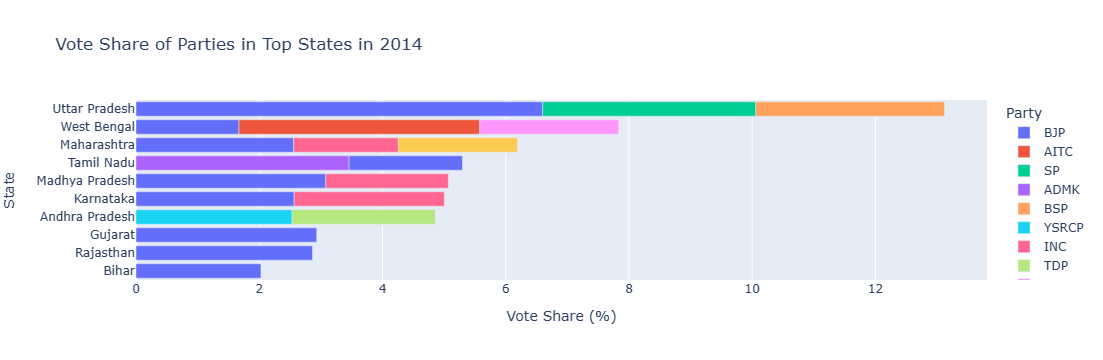

In [723]:

state_votes_2014_df=df_2014.groupby(['state','party'])['total_votes'].sum().reset_index()                # Calcualting total votes gained by a party
total_state_votes_2014=state_votes_2014_df['total_votes'].sum()                                          # Calculating total votes gained by all parties
state_votes_2014_df['vote_share_2014']=(state_votes_2014_df['total_votes']/total_state_votes_2014)*100   # Calculating vote share of each party
sorted_states_2014_df = state_votes_2014_df.sort_values(by='vote_share_2014', ascending=False).head(20)  # Sorting and filtering parties 

# Creating an interactive horizontal bar chart using Plotly for vote share of parties in 2014

fig = px.bar(sorted_states_2014_df,x='vote_share_2014',y='state',color='party',             
             orientation='h',
             labels={'state': 'State', 'vote_share_2014': 'Vote Share (%)', 'party': 'Party'},
             title='Vote Share of Parties in Top States in 2014',
             hover_data={'vote_share_2014': ':.2f'})

fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                  xaxis=dict(title='Vote Share (%)'),
                  legend_title='Party')

fig.show()

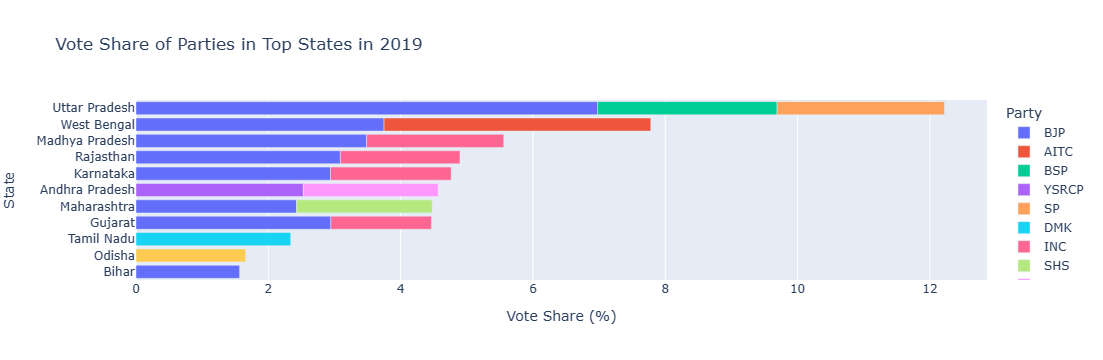

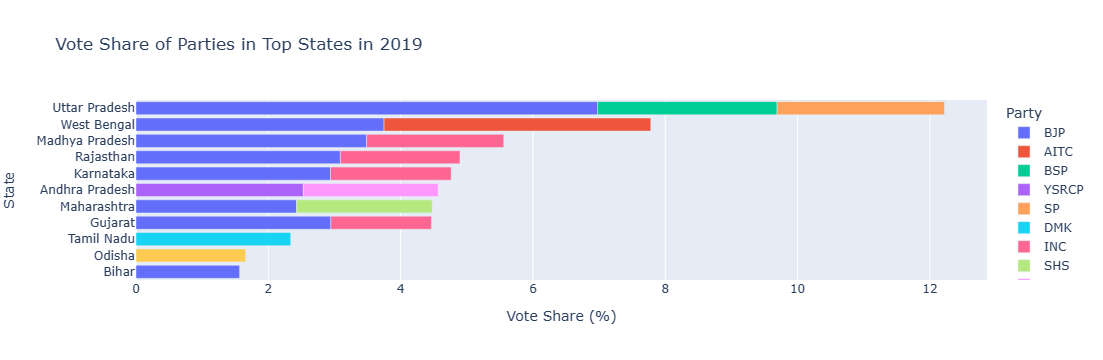

In [724]:

state_votes_2019_df=df_2019.groupby(['state','party'])['total_votes'].sum().reset_index()                # Calcualting total votes gained by a party
total_state_votes_2019=state_votes_2019_df['total_votes'].sum()                                          # Calculating total votes gained by all parties
state_votes_2019_df['vote_share_2019']=(state_votes_2019_df['total_votes']/total_state_votes_2019)*100   # Calculating vote share of each party
sorted_states_2019_df = state_votes_2019_df.sort_values(by='vote_share_2019', ascending=False).head(20)  # Sorting and filtering parties

# Creating an interactive horizontal bar chart using Plotly for vote share of parties in 2019
fig = px.bar(sorted_states_2019_df,x='vote_share_2019',y='state',color='party',             
             orientation='h',
             labels={'state': 'State','vote_share_2019': 'Vote Share (%)', 'party': 'Party'},
             title='Vote Share of Parties in Top States in 2019',
             hover_data={'vote_share_2019': ':.2f'})

fig.update_layout(yaxis={'categoryorder': 'total ascending'},
                  xaxis=dict(title='Vote Share (%)'),
                  legend_title='Party')

fig.show()

## 8. List top 5 constituencies for two major national parties where they have gained vote share in 2019 as compared to 2014

In [725]:
national_parties = ['BJP', 'INC']    # Two major national parties

# Grouping by parliamentary constituency and party for both 2014 and 2019 by total votes
party_votes_2014 = df_2014.groupby(['pc_name', 'party'])['total_votes'].sum().unstack(fill_value=0)
party_votes_2019 = df_2019.groupby(['pc_name', 'party'])['total_votes'].sum().unstack(fill_value=0)

# Calculating vote share gained for each party from 2014 to 2019
vote_share_gained = party_votes_2019 - party_votes_2014

# Filtering records for only the two major national parties
national_party_votes_2014 = vote_share_gained[national_parties]

# Finding top 5 constituencies where each party gained vote share
top_constituencies_party1 = national_party_votes_2014.sort_values(by='BJP', ascending=False).head(5)
top_constituencies_party2 = national_party_votes_2014.sort_values(by='INC', ascending=False).head(5)

print("Top 5 constituencies where BJP gained vote share:")
print(top_constituencies_party1)

print("\nTop 5 constituencies where INC gained vote share:")
print(top_constituencies_party2)

Top 5 constituencies where BJP gained vote share:
party                      BJP       INC
pc_name                                 
Sirsa_Haryana         714351.0   13799.0
Hisar_Haryana         603289.0   81860.0
Madha_Maharashtra     586314.0       0.0
Purulia_West Bengal   581871.0 -173446.0
Ranaghat_West Bengal  549583.0  -68921.0

Top 5 constituencies where INC gained vote share:
party                       BJP       INC
pc_name                                  
Thiruvallur _Tamil Nadu     0.0  723332.0
Karur_Tamil Nadu            0.0  665238.0
Arani_Tamil Nadu            0.0  590043.0
Krishnagiri_Tamil Nadu      0.0  572413.0
Tiruchirappalli_Tamil Nadu  0.0  569748.0


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 0, 'Vote Share Gained')

Text(0.5, 1.0, 'Top 5 Constituencies where BJP Gained Vote Share')

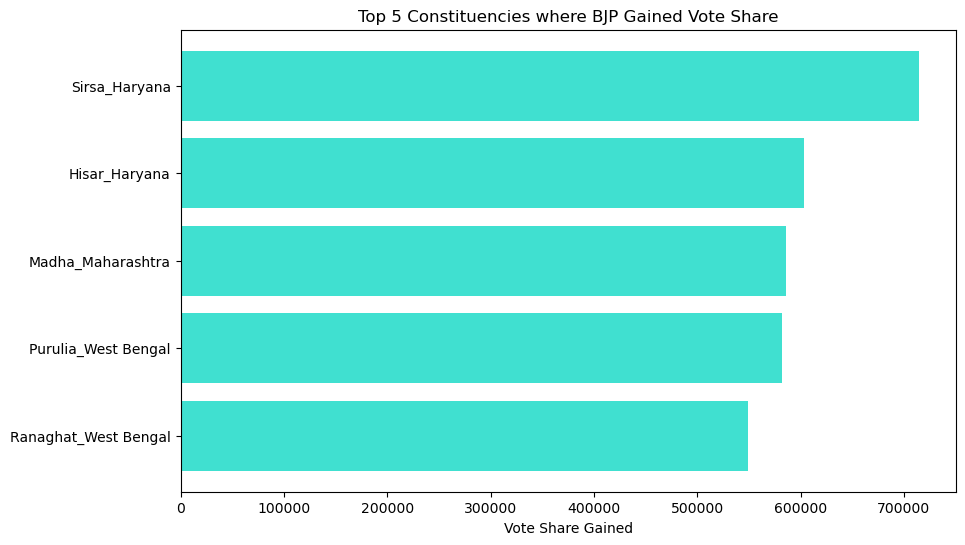

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 0, 'Vote Share Gained')

Text(0.5, 1.0, 'Top 5 Constituencies where INC Gained Vote Share')

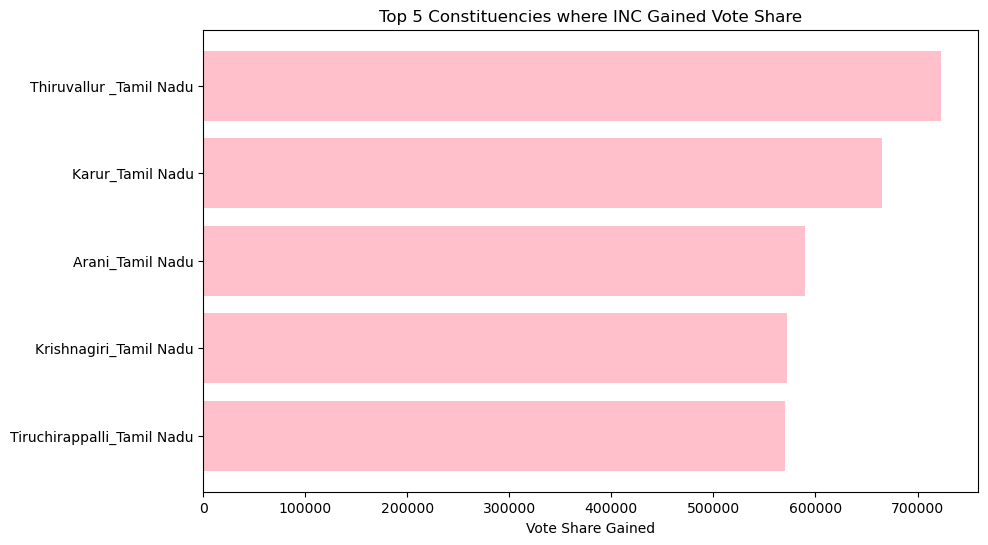

In [554]:

# Plotting horizontal bar chart for top 5 Constituencies where BJP Gained Vote Share
plt.figure(figsize=(10, 6))
plt.barh(top_constituencies_party1.index, top_constituencies_party1['BJP'], color='turquoise')
plt.xlabel('Vote Share Gained')
plt.title('Top 5 Constituencies where BJP Gained Vote Share')
plt.gca().invert_yaxis()                                                                    # Inverting y-axis to display top constituencies at the top
plt.show()

# Plotting horizontal bar chart for top 5 Constituencies where INC Gained Vote Share
plt.figure(figsize=(10, 6))
plt.barh(top_constituencies_party2.index, top_constituencies_party2['INC'], color='pink')
plt.xlabel('Vote Share Gained')
plt.title('Top 5 Constituencies where INC Gained Vote Share')
plt.gca().invert_yaxis() 
plt.show()

## 9. List top 5 constituencies for two major national parties where they have lost vote share in 2019 as compared to 2014

In [726]:
national_parties = ['BJP', 'INC']  

# Grouping by parliamentary constituency and party for both 2014 and 2019
party_votes_2014 = df_2014.groupby(['pc_name', 'party'])['total_votes'].sum().unstack(fill_value=0)
party_votes_2019 = df_2019.groupby(['pc_name', 'party'])['total_votes'].sum().unstack(fill_value=0)

# Calculating vote share change for each party from 2014 to 2019
vote_share_change = party_votes_2019 - party_votes_2014

# Filtering out rows where the vote share change is positive or zero replacing them with null values
vote_share_change[vote_share_change >= 0] = np.nan

# Filtering rows for only the two major national parties
national_party_votes_lost = vote_share_change[national_parties]

# Finding top 5 constituencies where each party lost vote share
top_constituencies_party1_lost = national_party_votes_lost.sort_values(by='BJP', ascending=True).head(5)
top_constituencies_party2_lost = national_party_votes_lost.sort_values(by='INC', ascending=True).head(5)

print("Top 5 constituencies where BJP lost vote share:")
print(top_constituencies_party1_lost)

print("\nTop 5 constituencies where INC lost vote share:")
print(top_constituencies_party2_lost)

Top 5 constituencies where BJP lost vote share:
party                              BJP       INC
pc_name                                         
Palghar _Maharashtra         -533201.0       NaN
Visakhapatnam_Andhra Pradesh -532940.0  -35999.0
Narsapuram_Andhra Pradesh    -527892.0  -13142.0
Tirupati _Andhra Pradesh     -526826.0   -9294.0
Gopalganj (SC)_Bihar         -478773.0 -191837.0

Top 5 constituencies where INC lost vote share:
party                         BJP       INC
pc_name                                    
Mandya_Karnataka         -86993.0 -518852.0
Hatkanangle_Maharashtra       NaN -462618.0
Tumkur_Karnataka              NaN -429868.0
Hassan_Karnataka              NaN -409379.0
Uttara Kannada_Karnataka      NaN -406239.0


<Figure size 1000x600 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 0, 'Vote Share Lost')

Text(0, 0.5, 'Constituency')

Text(0.5, 1.0, 'Top 5 Constituencies where BJP Lost Vote Share')

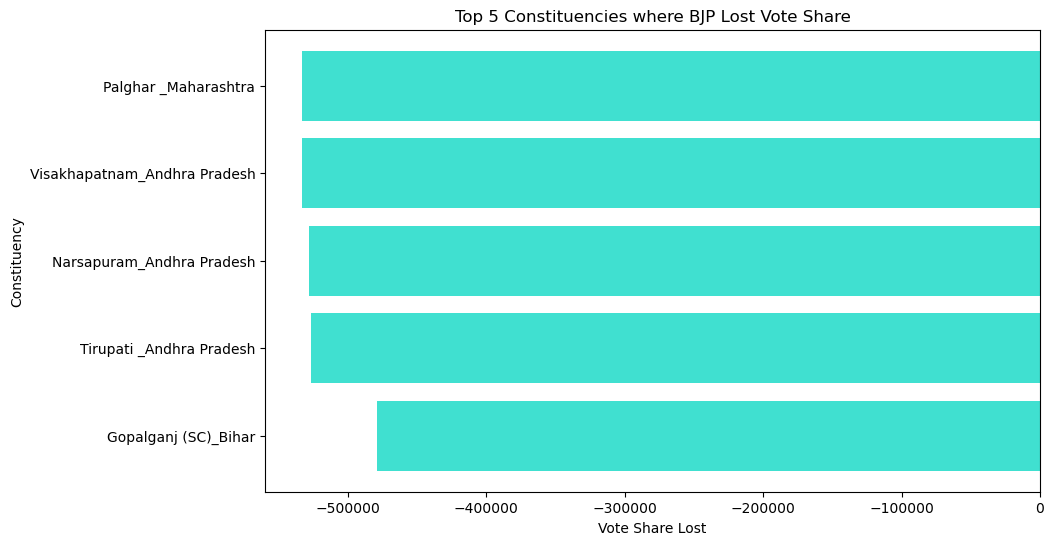

<Figure size 1000x600 with 0 Axes>

<BarContainer object of 5 artists>

Text(0.5, 0, 'Vote Share Lost')

Text(0, 0.5, 'Constituency')

Text(0.5, 1.0, 'Top 5 Constituencies where INC Lost Vote Share')

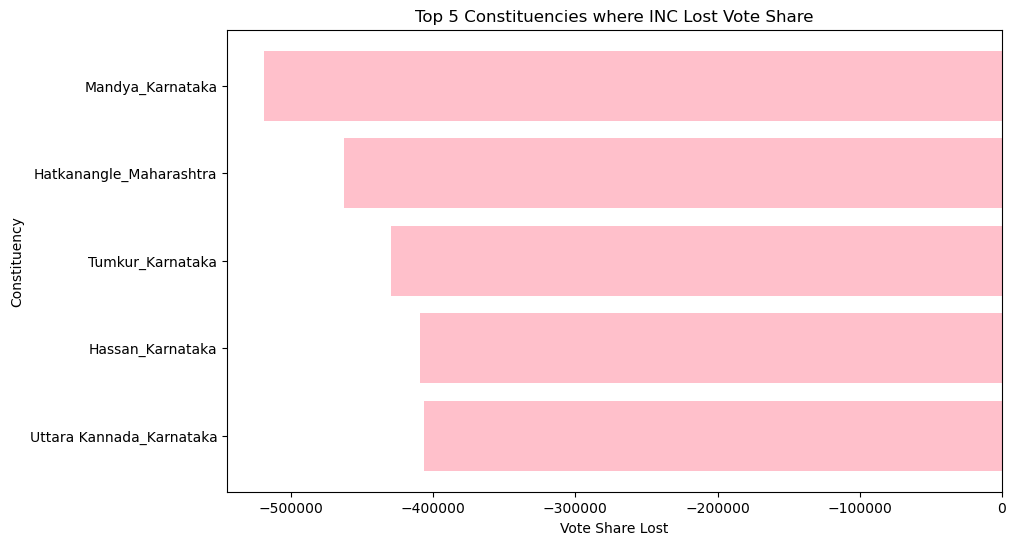

In [556]:

# Plot horizontal bar chart for top 5 constituencies where BJP Lost Vote Share
plt.figure(figsize=(10, 6))
plt.barh(top_constituencies_party1_lost.index, top_constituencies_party1_lost['BJP'], color='turquoise')
plt.xlabel('Vote Share Lost')
plt.ylabel('Constituency')
plt.title('Top 5 Constituencies where BJP Lost Vote Share')
plt.gca().invert_yaxis()                                                           # Invert y-axis to display top constituencies at the top
plt.show()

# Plot horizontal bar chart for top 5 constituencies where BJP Lost Vote Share
plt.figure(figsize=(10, 6))
plt.barh(top_constituencies_party2_lost.index, top_constituencies_party2_lost['INC'], color='pink')
plt.xlabel('Vote Share Lost')
plt.ylabel('Constituency')
plt.title('Top 5 Constituencies where INC Lost Vote Share')
plt.gca().invert_yaxis()                                                            # Invert y-axis to display top constituencies at the top
plt.show()


## 10. Which constituency has voted the most for NOTA?

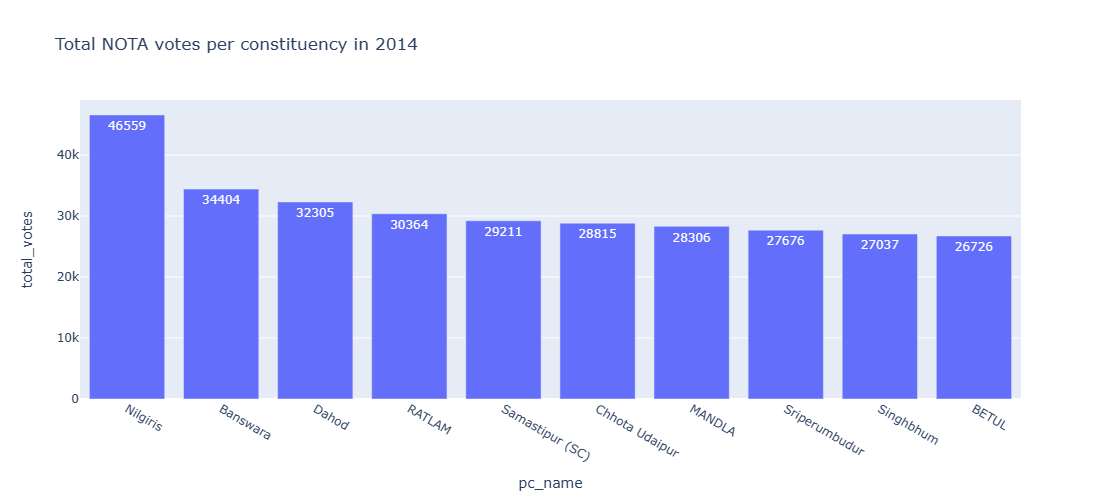

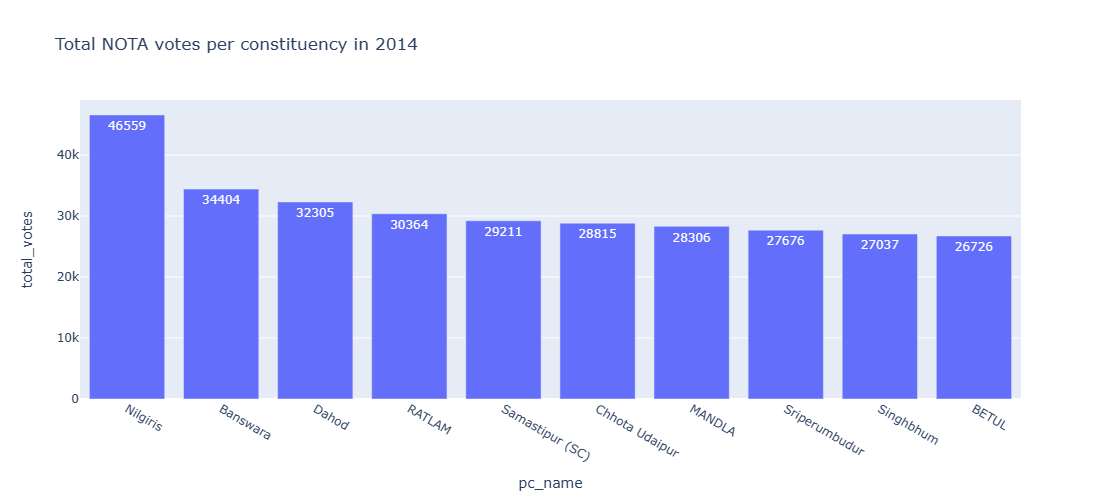

In [557]:

filtered_df = df_2014[df_2014['candidate'] == 'None of the Above']                 # Filtering DataFrame to select  rows where candidate is 'NOTA'

sorted_df = filtered_df.sort_values(by='total_votes', ascending=False).head(10)    # Sorting the filtered DataFrame by total_votes in descending order
                                                      
fig = px.bar(sorted_df, x='pc_name', y='total_votes', 
             text='total_votes', height=500,                                     
             title='Total NOTA votes per constituency in 2014')                    # Paasing slice of sorted dataframe to plot bar chart

fig.update_traces(textposition='inside')                                           # Placing the labels inside the bars.

fig.show()                                                                         # Displaying the bar chart

### In 2014, Nilgiris constituency has recorded highest number of NOTA votes

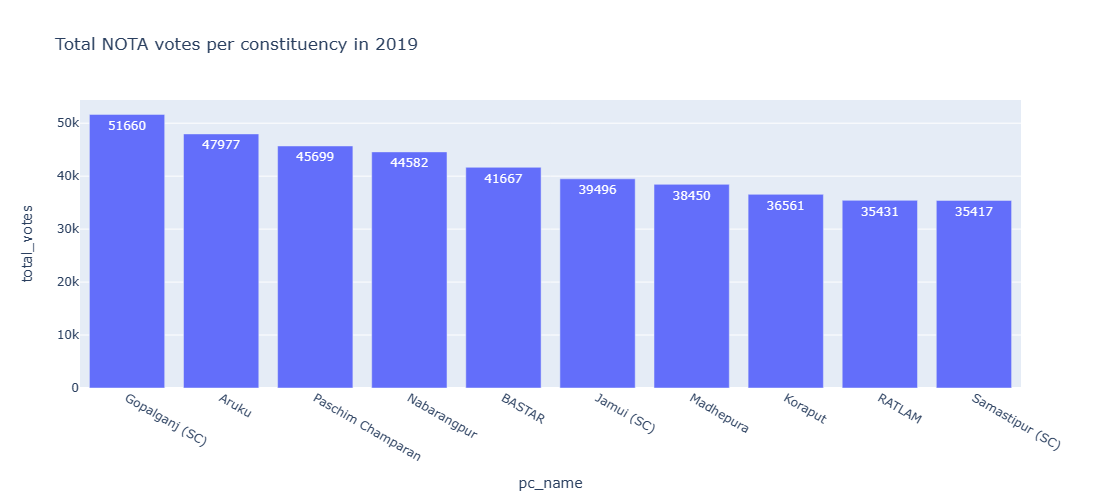

In [100]:
filtered_df = df_2019[df_2019['candidate'] == 'NOTA']                              # Filtering DataFrame to select  rows where candidate is 'NOTA'

sorted_df = filtered_df.sort_values(by='total_votes', ascending=False)             # Sorting the filtered DataFrame by total_votes in descending order

num_bars_to_display = 10                                                           # To display top 10 records

fig = px.bar(sorted_df[:num_bars_to_display], x='pc_name', y='total_votes', 
             text='total_votes', height=500,                                     
             title='Total NOTA votes per constituency in 2019')                    # Paasing slice of sorted dataframe to plot bar chart

fig.update_traces(textposition='inside')                                           # Placing the labels inside the bars.

fig.show()                                                                         # Displaying the bar chart

### In 2019, Gopalganj (SC) constituency has recorded highest number of NOTA votes.

## 11. Which constituencies have elected candidates whose party has less than 10% vote share at state level in 2019

In [789]:

# Calculating total votes cast for each party in each constituency
party_votes = df_2019.groupby(['pc_name', 'party'])['total_votes'].sum().reset_index()

# Determining the winning party for each constituency
winning_party_indices = party_votes.groupby('pc_name')['total_votes'].idxmax()
winning_party = party_votes.loc[winning_party_indices]

# Calculating total votes cast in each constituency
total_votes_per_constituency = df_2019.groupby('pc_name')['total_votes'].sum().reset_index()

# Merging the two DataFrames to calculate percentage vote share for the winning party in each constituency
winning_party = winning_party.merge(total_votes_per_constituency,on='pc_name',suffixes=('_party', '_total'))

# Calculating percentage vote share for the winning party in each constituency
winning_party['vote_share_percentage'] =(winning_party['total_votes_party']/winning_party['total_votes_total'])*100

# Identifying the constituencies where the winning party's vote share is less than 10% at the state level
constituencies_less_than_10_percent = winning_party[winning_party['vote_share_percentage'] < 10]['pc_name'].unique()

print("Constituencies where the winning party's vote share is less than 10% at the state level in 2019:")
print(constituencies_less_than_10_percent)


Constituencies where the winning party's vote share is less than 10% at the state level in 2019:
[]


### No constituency has winning party vote share less than 10% at state level in 2019

## 12. Is there a correlation between postal votes % and voter turnout % ?

<Axes: xlabel='Postal Votes (%) 2014', ylabel='Voter Turnout (%) 2014'>

Text(0.5, 1.0, 'Correlation between Postal Votes (%) and Voter Turnout (%) in 2014')

Text(0.5, 0, 'Postal Votes (%)')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

<Axes: xlabel='Postal Votes (%) 2019', ylabel='Voter Turnout (%) 2019'>

Text(0.5, 1.0, 'Correlation between Postal Votes (%) and Voter Turnout (%) in 2019')

Text(0.5, 0, 'Postal Votes (%)')

Text(0, 0.5, 'Voter Turnout Ratio (%)')

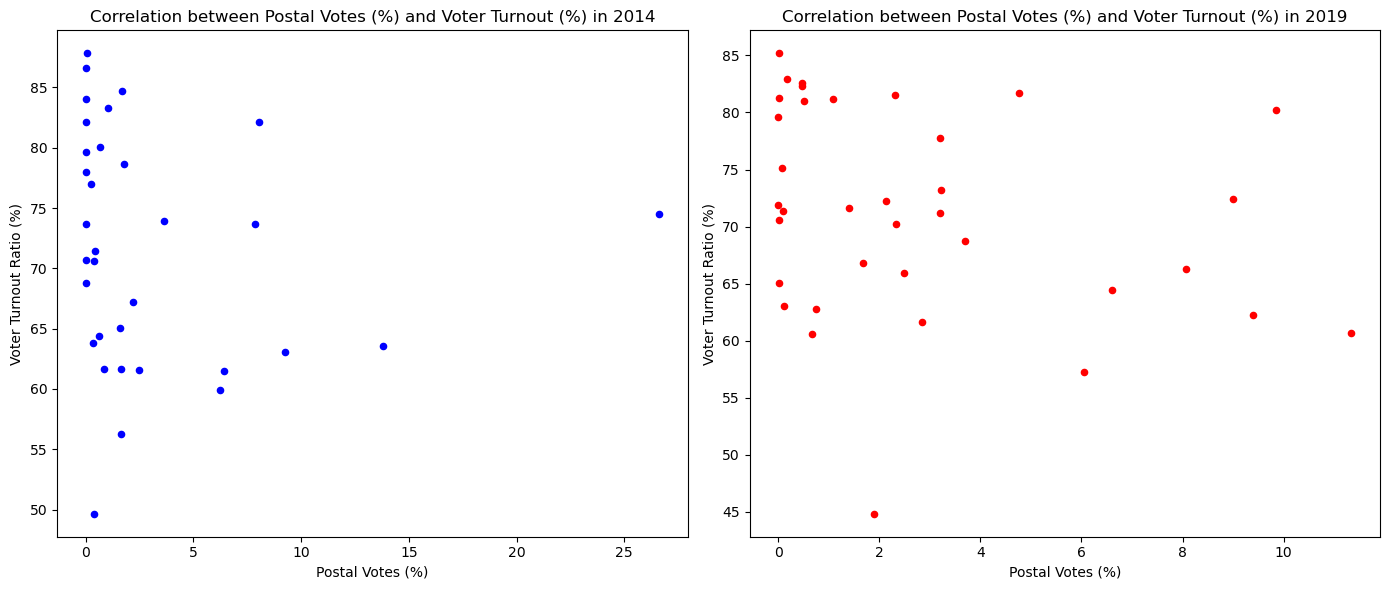

In [631]:

postal_votes_by_states_2014=df_2014.groupby('state')['postal_votes'].sum()                            # Caluculating postal votes by states
#postal_votes_by_states
total_postal_votes_in_country_2014=df_2014['postal_votes'].sum()                                      # Calculating postal votes by country
#total_postal_votes_in_country
postal_votes_pcnt_2014=round((postal_votes_by_states_2014/total_postal_votes_in_country_2014)*100,2)  # Calculating postal votes % by states
#postal_votes_pcnt_by_states

unique_df_2014 = df_2014.drop_duplicates(subset=['pc_name'])                                          # Dropping duplicate rows based on pc_name 
#unique_df_2014
total_electors_by_state_2014 = unique_df_2014.groupby('state')['total_electors'].sum()                # Calculating total electors by state
#print(total_electors_by_state)
total_votes_by_states_2014 = df_2014.groupby('state')['total_votes'].sum()                            # Calculating total votes by states
#total_votes_by_states
voter_turnout_pcnt_2014=round((total_votes_by_states_2014/total_electors_by_state_2014)*100,2)        # Calculating voter turnout % by states
#voter_turnout_pcnt_2014

correlation_data_2014 = pd.DataFrame({'Postal Votes (%) 2014': postal_votes_pcnt_2014,  
                                 'Voter Turnout (%) 2014': voter_turnout_pcnt_2014})                  # Combining the two Series into a DataFrame
#------------------------------------------------------------------------------------------------------------------------------------------------------#

postal_votes_by_states_2019=df_2019.groupby('state')['postal_votes'].sum()                            # Caluculating postal votes by states
#postal_votes_by_states
total_postal_votes_in_country_2019=df_2019['postal_votes'].sum()                                      # Calculating postal votes by country
#total_postal_votes_in_country
postal_votes_pcnt_2019=round((postal_votes_by_states_2019/total_postal_votes_in_country_2019)*100,2)  # Calculating postal votes % by states
#postal_votes_pcnt_by_states

unique_df_2019 = df_2019.drop_duplicates(subset=['pc_name'])                                          # Dropping duplicate rows based on pc_name 
#unique_df_2019
total_electors_by_state_2019 = unique_df_2019.groupby('state')['total_electors'].sum()                # Calculating total electors by state
#print(total_electors_by_state)
total_votes_by_states_2019 = df_2019.groupby('state')['total_votes'].sum()                            # Calculating total votes by states
#total_votes_by_states
voter_turnout_pcnt_2019=round((total_votes_by_states_2019/total_electors_by_state_2019)*100,2)        # Calculating voter turnout % by states
#voter_turnout_pcnt_2014

correlation_data_2019 = pd.DataFrame({'Postal Votes (%) 2019': postal_votes_pcnt_2019,  
                                 'Voter Turnout (%) 2019': voter_turnout_pcnt_2019})                  # Combining the two Series into a DataFrame

# Plot correlation chart
#sns.scatterplot(data=correlation_data_2014, x='Postal Votes (%)', y='Voter Turnout (%)')
#plt.title('Correlation between Postal Votes (%) and Voter Turnout (%) in 2014')
#plt.xlabel('Postal Votes (%)')
#plt.ylabel('Voter Turnout (%)')
#plt.show()
#-------------------------------------------------------------------------------------------------------------------------------------------------------#
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))                                           # Creating a scatter plot with two subplots

correlation_data_2014.plot(kind='scatter', ax=axes[0], color='blue', x='Postal Votes (%) 2014', y='Voter Turnout (%) 2014')                                        # Plotting the top 5 rows
axes[0].set_title('Correlation between Postal Votes (%) and Voter Turnout (%) in 2014')
axes[0].set_xlabel('Postal Votes (%)')
axes[0].set_ylabel('Voter Turnout Ratio (%)')
 
correlation_data_2019.plot(kind='scatter', ax=axes[1], color='red', x='Postal Votes (%) 2019', y='Voter Turnout (%) 2019')                                          # Plotting the bottom 5 rows
axes[1].set_title('Correlation between Postal Votes (%) and Voter Turnout (%) in 2019')
axes[1].set_xlabel('Postal Votes (%)')
axes[1].set_ylabel('Voter Turnout Ratio (%)')

plt.tight_layout()                                                                           # Adjusting the layout

plt.show()                                                                                   # Displaying the plots

## 14. Is there a correlation between literacy % of the state and voter turnout % ?

C:\Users\91961\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\91961\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\91961\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\91961\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Correlation between literacy rate (%) and Voter Turnout (%) in 2019')

Text(0.5, 58.7222222222222, 'literacy_rate')

Text(62.597222222222214, 0.5, 'Voter Turnout (%)')

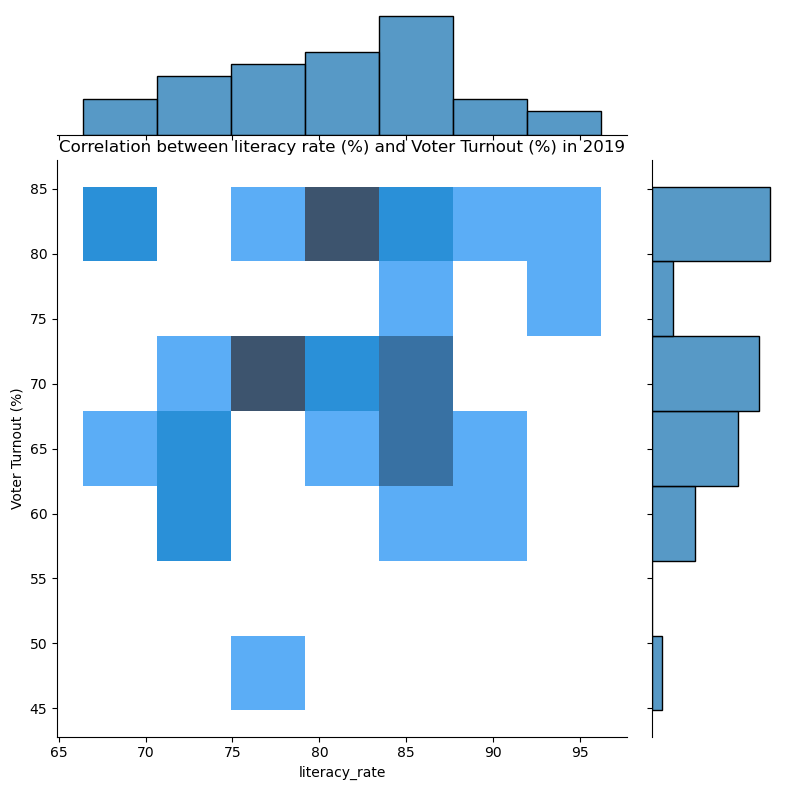

In [733]:

# Correlation data file containing voter turnout percentage is obtained from above
correlation_data_2019 = pd.DataFrame({'Postal Votes (%) 2019': postal_votes_pcnt_2019,        
                                 'Voter Turnout (%) 2019': voter_turnout_pcnt_2019}) 

df_lr=pd.read_csv(r"C:\Users\91961\Downloads\literacy rate.csv")                                              # Reading literacy rate file

correlation_by_literacy_rate=pd.merge(correlation_data_2019,df_lr,on='state')                                 # Merging both files by state 

#sns.scatterplot(data=correlation_by_literacy_rate, x='literacy_rate', y='Voter Turnout (%) 2019')            # Plotting  correlation map
sns.jointplot(data=correlation_by_literacy_rate,x='literacy_rate',y='Voter Turnout (%) 2019',kind='hist',height=8,ratio=4)
#plt.figure(figsize=(12, 8))
plt.title('Correlation between literacy rate (%) and Voter Turnout (%) in 2019')
plt.xlabel('literacy_rate')
plt.ylabel('Voter Turnout (%)')
#plt.subplots_adjust(top=0.9, right=0.9)
plt.show()

In [ ]:
13. Is there a correlation between GDP of a state and voter turnout % ?

<Axes: >

Text(0.5, 1.0, 'Correlation Heatmap between GDP and Voter Turnout (%) in 2019')

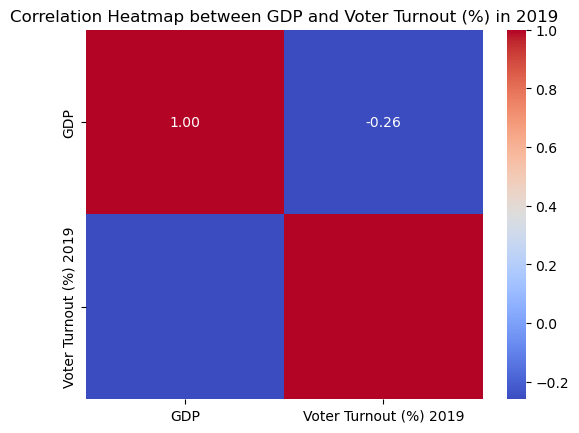

In [664]:

# Correlation data file containing voter turnout percentage is obtained from above
correlation_data_2019 = pd.DataFrame({'Postal Votes (%) 2019': postal_votes_pcnt_2019,  
                                 'Voter Turnout (%) 2019': voter_turnout_pcnt_2019}) 

df_gdp=pd.read_csv(r"C:\Users\91961\Downloads\GDP.csv")                                                             # Reading literacy rate file

correlation_by_gdp=pd.merge(correlation_data_2019,df_gdp,on='state')                                                # Merging both files by state

#correlation_by_gdp.plot(kind='scatter', color='blue', x='GDP', y='Voter Turnout (%) 2019')  

sns.heatmap(correlation_by_gdp[['GDP', 'Voter Turnout (%) 2019']].corr(), annot=True, cmap='coolwarm', fmt=".2f")   # Plotting heat map
plt.title('Correlation Heatmap between GDP and Voter Turnout (%) in 2019')
plt.show()

In [743]:
correlation_by_gdp[['GDP', 'Voter Turnout (%) 2019']].corr()

,GDP,Voter Turnout (%) 2019
GDP,1.000000,-0.259442
Voter Turnout (%) 2019,-0.259442,1.000000


### Candidates ratio based on gender in 2014 and 2019

([<matplotlib.patches.Wedge at 0x1e7f7a7a590>,
 [Text(-0.29976916664651104, -1.161954580320615, 'MALE'),
  Text(0.27478837782825144, 1.0651250383924502, 'FEMALE')],
 [Text(-0.23731725692848787, -0.9198807094204868, '92.0%'),
  Text(0.21233647377637607, 0.8230511660305295, '8.0%')])

Text(0.5, 1.0, 'Male vs Female ratio in 2014')

([<matplotlib.patches.Wedge at 0x1e7ea171d90>,
 [Text(-0.3355450447307191, -1.1521325978187842, 'MALE'),
  Text(0.3075830318307522, 1.0561215264020531, 'FEMALE')],
 [Text(-0.265639827078486, -0.9121049732732041, '91.0%'),
  Text(0.23767779732376304, 0.8160939067652229, '9.0%')])

Text(0.5, 1.0, 'Male vs Female ratio in 2019')

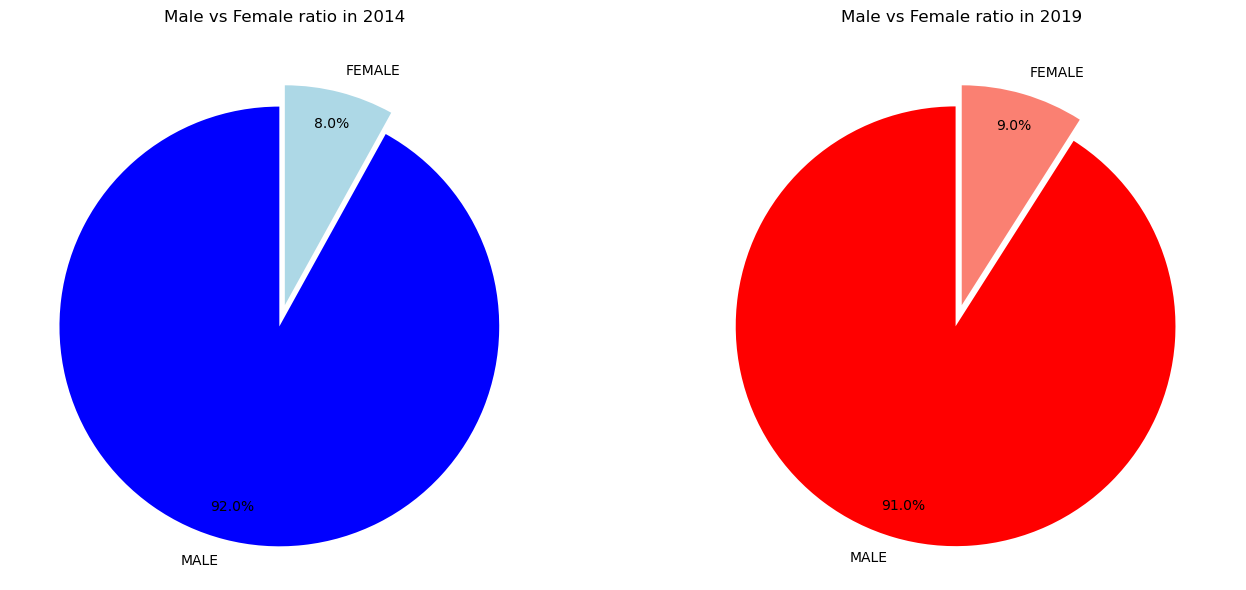

In [817]:
male_count_2014=(df_2014['sex']=='M').sum()
female_count_2014=(df_2014['sex']=='F').sum()

male_count_2019=(df_2019['sex']=='MALE').sum()
female_count_2019=(df_2019['sex']=='FEMALE').sum()


y_2014=np.array([male_count_2014,female_count_2014])
y_2019=np.array([male_count_2019,female_count_2019])

pie_labels = ["MALE","FEMALE"]
explodeTuple = (0.1, 0.0)

clrs_2014=['blue','lightblue']
clrs_2019=['red','salmon']

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(14, 6))                               

axes[0].pie(y_2014,explode=explodeTuple, labels = pie_labels, startangle = 90,autopct='%1.1f%%',pctdistance=0.85,colors=clrs_2014)        # Plotting a pie chart
axes[0].set_title('Male vs Female ratio in 2014')

axes[1].pie(y_2019,explode=explodeTuple, labels = pie_labels, startangle = 90,autopct='%1.1f%%',pctdistance=0.85,colors=clrs_2019)
axes[1].set_title('Male vs Female ratio in 2019')

plt.tight_layout()                                                                         

plt.show()   

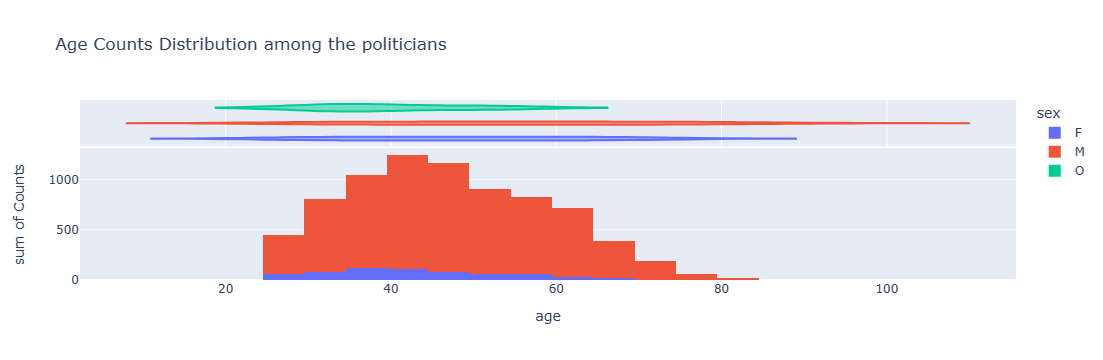

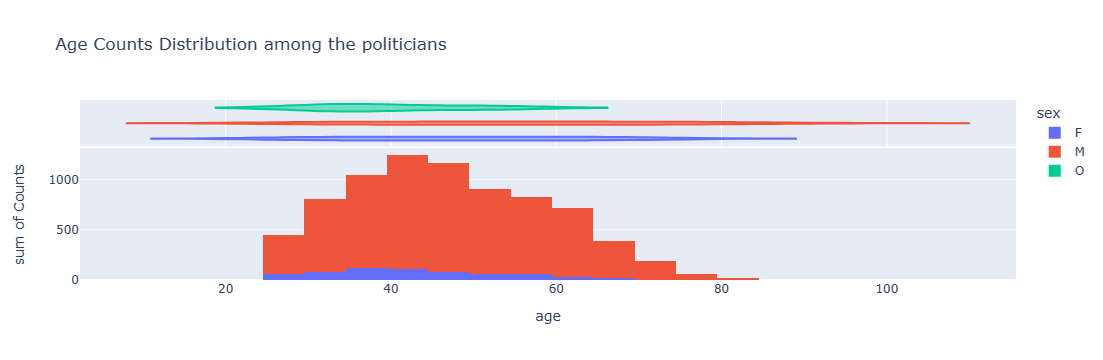

In [826]:
age_cnt=df_2014.groupby(['age','sex']).apply(lambda x:x['age'].count()).reset_index(name='Counts')
fig = px.histogram(age_cnt, x="age",y='Counts',color='sex',marginal='violin',title='Age Counts Distribution among the politicians')
fig.update_layout(title_text='Age Counts Distribution among the politicians')
fig.show()

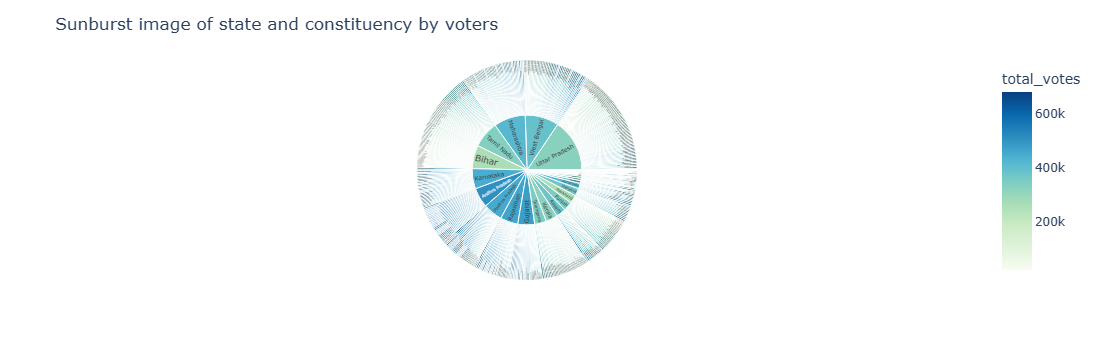

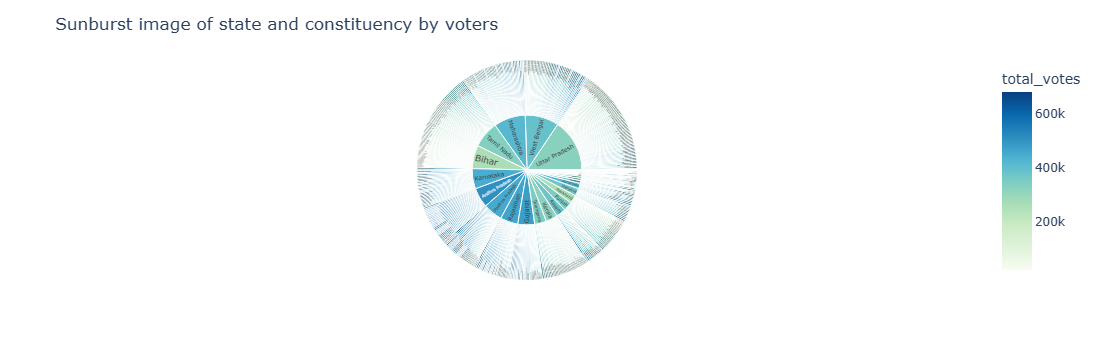

In [831]:
sun_burst_img=df_2014[['state','pc_name','total_votes']]

fig = px.sunburst(sun_burst_img, path=['state','pc_name'], values='total_votes',color='total_votes',color_continuous_scale='GnBu')

fig.update_layout(title_text='Sunburst image of state and constituency by voters')
fig.show()